# Deep Q-Network (DQN)
---
In this notebook, you will implement a DQN agent with OpenAI Gym's CartPole-v0 environment.

### 1. Import the Necessary Packages

In [1]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Instantiate the Environment and Agent

Initialize the environment in the code cell below.

In [2]:
env = gym.make('CartPole-v0') # R_goal = 200
# env = gym.make('CartPole-v1') # R_goal = 500

random_seed = 10
env.seed(random_seed)

/home/arasdar/anaconda3/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


[10]

Please refer to the instructions in `Deep_Q_Network.ipynb` if you would like to write your own DQN agent.  Otherwise, run the code cell below to load the solution files.

In [3]:
env.observation_space, env.action_space

(Box(4,), Discrete(2))

In [4]:
env.observation_space.shape, env.action_space.shape

((4,), ())

In [5]:
env.observation_space.shape[0], env.action_space.n

(4, 2)

In [6]:
from agent import Agent

agent = Agent(s_size=env.observation_space.shape[0], a_size=env.action_space.n, 
              random_seed=random_seed)

In [7]:
len(agent.memory)

0

In [8]:
agent.memory.buffer.maxlen

100000

In [10]:
# watch an untrained agent
s = env.reset()
R = 0

n_steps = agent.memory.buffer.maxlen

for i_step in range(n_steps):
    #env.render()

    #a = agent.act(s)
    a = env.action_space.sample()
    
    s2, r, done, _ = env.step(a)
    
    agent.step(s, a, r, s2, done)
    
    R += r
    s = s2
    
    if done:
        #break 
        print('total reward:', R, '%_step:', i_step/n_steps)

        # watch an untrained agent
        s = env.reset()
        R = 0
            
env.close()

total reward: 11.0 step number: 10
total reward: 15.0 step number: 25
total reward: 16.0 step number: 41
total reward: 12.0 step number: 53
total reward: 19.0 step number: 72
total reward: 18.0 step number: 90
total reward: 17.0 step number: 107
total reward: 18.0 step number: 125
total reward: 11.0 step number: 136
total reward: 25.0 step number: 161
total reward: 26.0 step number: 187
total reward: 13.0 step number: 200
total reward: 20.0 step number: 220
total reward: 23.0 step number: 243
total reward: 19.0 step number: 262
total reward: 21.0 step number: 283
total reward: 19.0 step number: 302
total reward: 13.0 step number: 315
total reward: 13.0 step number: 328
total reward: 14.0 step number: 342
total reward: 15.0 step number: 357
total reward: 39.0 step number: 396
total reward: 21.0 step number: 417
total reward: 19.0 step number: 436
total reward: 39.0 step number: 475
total reward: 16.0 step number: 491
total reward: 26.0 step number: 517
total reward: 40.0 step number: 55

total reward: 23.0 step number: 5040
total reward: 20.0 step number: 5060
total reward: 26.0 step number: 5086
total reward: 11.0 step number: 5097
total reward: 13.0 step number: 5110
total reward: 30.0 step number: 5140
total reward: 16.0 step number: 5156
total reward: 21.0 step number: 5177
total reward: 14.0 step number: 5191
total reward: 40.0 step number: 5231
total reward: 31.0 step number: 5262
total reward: 15.0 step number: 5277
total reward: 29.0 step number: 5306
total reward: 12.0 step number: 5318
total reward: 29.0 step number: 5347
total reward: 9.0 step number: 5356
total reward: 16.0 step number: 5372
total reward: 29.0 step number: 5401
total reward: 31.0 step number: 5432
total reward: 27.0 step number: 5459
total reward: 26.0 step number: 5485
total reward: 28.0 step number: 5513
total reward: 18.0 step number: 5531
total reward: 13.0 step number: 5544
total reward: 10.0 step number: 5554
total reward: 37.0 step number: 5591
total reward: 20.0 step number: 5611
to

total reward: 26.0 step number: 9857
total reward: 32.0 step number: 9889
total reward: 31.0 step number: 9920
total reward: 10.0 step number: 9930
total reward: 19.0 step number: 9949
total reward: 16.0 step number: 9965
total reward: 17.0 step number: 9982
total reward: 18.0 step number: 10000
total reward: 13.0 step number: 10013
total reward: 20.0 step number: 10033
total reward: 24.0 step number: 10057
total reward: 14.0 step number: 10071
total reward: 22.0 step number: 10093
total reward: 58.0 step number: 10151
total reward: 16.0 step number: 10167
total reward: 14.0 step number: 10181
total reward: 32.0 step number: 10213
total reward: 15.0 step number: 10228
total reward: 22.0 step number: 10250
total reward: 10.0 step number: 10260
total reward: 9.0 step number: 10269
total reward: 26.0 step number: 10295
total reward: 38.0 step number: 10333
total reward: 23.0 step number: 10356
total reward: 36.0 step number: 10392
total reward: 16.0 step number: 10408
total reward: 11.0 s

total reward: 21.0 step number: 14708
total reward: 16.0 step number: 14724
total reward: 12.0 step number: 14736
total reward: 10.0 step number: 14746
total reward: 31.0 step number: 14777
total reward: 29.0 step number: 14806
total reward: 30.0 step number: 14836
total reward: 30.0 step number: 14866
total reward: 13.0 step number: 14879
total reward: 12.0 step number: 14891
total reward: 45.0 step number: 14936
total reward: 20.0 step number: 14956
total reward: 11.0 step number: 14967
total reward: 22.0 step number: 14989
total reward: 10.0 step number: 14999
total reward: 39.0 step number: 15038
total reward: 19.0 step number: 15057
total reward: 37.0 step number: 15094
total reward: 15.0 step number: 15109
total reward: 19.0 step number: 15128
total reward: 12.0 step number: 15140
total reward: 15.0 step number: 15155
total reward: 21.0 step number: 15176
total reward: 29.0 step number: 15205
total reward: 19.0 step number: 15224
total reward: 37.0 step number: 15261
total reward

total reward: 32.0 step number: 19525
total reward: 28.0 step number: 19553
total reward: 26.0 step number: 19579
total reward: 23.0 step number: 19602
total reward: 22.0 step number: 19624
total reward: 11.0 step number: 19635
total reward: 13.0 step number: 19648
total reward: 32.0 step number: 19680
total reward: 32.0 step number: 19712
total reward: 12.0 step number: 19724
total reward: 37.0 step number: 19761
total reward: 22.0 step number: 19783
total reward: 16.0 step number: 19799
total reward: 22.0 step number: 19821
total reward: 16.0 step number: 19837
total reward: 9.0 step number: 19846
total reward: 62.0 step number: 19908
total reward: 14.0 step number: 19922
total reward: 21.0 step number: 19943
total reward: 16.0 step number: 19959
total reward: 16.0 step number: 19975
total reward: 15.0 step number: 19990
total reward: 17.0 step number: 20007
total reward: 32.0 step number: 20039
total reward: 14.0 step number: 20053
total reward: 19.0 step number: 20072
total reward:

total reward: 27.0 step number: 24669
total reward: 28.0 step number: 24697
total reward: 19.0 step number: 24716
total reward: 12.0 step number: 24728
total reward: 13.0 step number: 24741
total reward: 16.0 step number: 24757
total reward: 13.0 step number: 24770
total reward: 27.0 step number: 24797
total reward: 32.0 step number: 24829
total reward: 20.0 step number: 24849
total reward: 68.0 step number: 24917
total reward: 26.0 step number: 24943
total reward: 22.0 step number: 24965
total reward: 33.0 step number: 24998
total reward: 21.0 step number: 25019
total reward: 15.0 step number: 25034
total reward: 18.0 step number: 25052
total reward: 12.0 step number: 25064
total reward: 18.0 step number: 25082
total reward: 11.0 step number: 25093
total reward: 14.0 step number: 25107
total reward: 14.0 step number: 25121
total reward: 14.0 step number: 25135
total reward: 22.0 step number: 25157
total reward: 20.0 step number: 25177
total reward: 45.0 step number: 25222
total reward

total reward: 27.0 step number: 29596
total reward: 18.0 step number: 29614
total reward: 24.0 step number: 29638
total reward: 15.0 step number: 29653
total reward: 15.0 step number: 29668
total reward: 27.0 step number: 29695
total reward: 14.0 step number: 29709
total reward: 11.0 step number: 29720
total reward: 38.0 step number: 29758
total reward: 13.0 step number: 29771
total reward: 15.0 step number: 29786
total reward: 18.0 step number: 29804
total reward: 26.0 step number: 29830
total reward: 13.0 step number: 29843
total reward: 18.0 step number: 29861
total reward: 26.0 step number: 29887
total reward: 24.0 step number: 29911
total reward: 15.0 step number: 29926
total reward: 23.0 step number: 29949
total reward: 27.0 step number: 29976
total reward: 14.0 step number: 29990
total reward: 21.0 step number: 30011
total reward: 10.0 step number: 30021
total reward: 43.0 step number: 30064
total reward: 11.0 step number: 30075
total reward: 27.0 step number: 30102
total reward

total reward: 11.0 step number: 34616
total reward: 24.0 step number: 34640
total reward: 15.0 step number: 34655
total reward: 11.0 step number: 34666
total reward: 14.0 step number: 34680
total reward: 13.0 step number: 34693
total reward: 17.0 step number: 34710
total reward: 39.0 step number: 34749
total reward: 19.0 step number: 34768
total reward: 22.0 step number: 34790
total reward: 19.0 step number: 34809
total reward: 36.0 step number: 34845
total reward: 17.0 step number: 34862
total reward: 17.0 step number: 34879
total reward: 13.0 step number: 34892
total reward: 14.0 step number: 34906
total reward: 24.0 step number: 34930
total reward: 22.0 step number: 34952
total reward: 16.0 step number: 34968
total reward: 12.0 step number: 34980
total reward: 10.0 step number: 34990
total reward: 21.0 step number: 35011
total reward: 36.0 step number: 35047
total reward: 15.0 step number: 35062
total reward: 23.0 step number: 35085
total reward: 11.0 step number: 35096
total reward

total reward: 11.0 step number: 39471
total reward: 33.0 step number: 39504
total reward: 11.0 step number: 39515
total reward: 28.0 step number: 39543
total reward: 17.0 step number: 39560
total reward: 28.0 step number: 39588
total reward: 20.0 step number: 39608
total reward: 8.0 step number: 39616
total reward: 36.0 step number: 39652
total reward: 19.0 step number: 39671
total reward: 17.0 step number: 39688
total reward: 20.0 step number: 39708
total reward: 27.0 step number: 39735
total reward: 16.0 step number: 39751
total reward: 64.0 step number: 39815
total reward: 14.0 step number: 39829
total reward: 17.0 step number: 39846
total reward: 11.0 step number: 39857
total reward: 17.0 step number: 39874
total reward: 22.0 step number: 39896
total reward: 46.0 step number: 39942
total reward: 27.0 step number: 39969
total reward: 27.0 step number: 39996
total reward: 15.0 step number: 40011
total reward: 17.0 step number: 40028
total reward: 25.0 step number: 40053
total reward:

total reward: 34.0 step number: 44422
total reward: 19.0 step number: 44441
total reward: 13.0 step number: 44454
total reward: 14.0 step number: 44468
total reward: 10.0 step number: 44478
total reward: 13.0 step number: 44491
total reward: 12.0 step number: 44503
total reward: 14.0 step number: 44517
total reward: 15.0 step number: 44532
total reward: 13.0 step number: 44545
total reward: 25.0 step number: 44570
total reward: 19.0 step number: 44589
total reward: 19.0 step number: 44608
total reward: 13.0 step number: 44621
total reward: 38.0 step number: 44659
total reward: 17.0 step number: 44676
total reward: 14.0 step number: 44690
total reward: 36.0 step number: 44726
total reward: 21.0 step number: 44747
total reward: 19.0 step number: 44766
total reward: 19.0 step number: 44785
total reward: 22.0 step number: 44807
total reward: 61.0 step number: 44868
total reward: 11.0 step number: 44879
total reward: 13.0 step number: 44892
total reward: 23.0 step number: 44915
total reward

total reward: 18.0 step number: 49499
total reward: 13.0 step number: 49512
total reward: 12.0 step number: 49524
total reward: 18.0 step number: 49542
total reward: 13.0 step number: 49555
total reward: 16.0 step number: 49571
total reward: 24.0 step number: 49595
total reward: 21.0 step number: 49616
total reward: 17.0 step number: 49633
total reward: 16.0 step number: 49649
total reward: 14.0 step number: 49663
total reward: 18.0 step number: 49681
total reward: 17.0 step number: 49698
total reward: 12.0 step number: 49710
total reward: 9.0 step number: 49719
total reward: 17.0 step number: 49736
total reward: 21.0 step number: 49757
total reward: 17.0 step number: 49774
total reward: 11.0 step number: 49785
total reward: 28.0 step number: 49813
total reward: 12.0 step number: 49825
total reward: 16.0 step number: 49841
total reward: 18.0 step number: 49859
total reward: 25.0 step number: 49884
total reward: 12.0 step number: 49896
total reward: 11.0 step number: 49907
total reward:

total reward: 31.0 step number: 53939
total reward: 11.0 step number: 53950
total reward: 21.0 step number: 53971
total reward: 33.0 step number: 54004
total reward: 19.0 step number: 54023
total reward: 69.0 step number: 54092
total reward: 27.0 step number: 54119
total reward: 20.0 step number: 54139
total reward: 15.0 step number: 54154
total reward: 17.0 step number: 54171
total reward: 17.0 step number: 54188
total reward: 28.0 step number: 54216
total reward: 14.0 step number: 54230
total reward: 59.0 step number: 54289
total reward: 34.0 step number: 54323
total reward: 17.0 step number: 54340
total reward: 28.0 step number: 54368
total reward: 17.0 step number: 54385
total reward: 13.0 step number: 54398
total reward: 29.0 step number: 54427
total reward: 10.0 step number: 54437
total reward: 24.0 step number: 54461
total reward: 8.0 step number: 54469
total reward: 15.0 step number: 54484
total reward: 19.0 step number: 54503
total reward: 22.0 step number: 54525
total reward:

total reward: 25.0 step number: 58711
total reward: 11.0 step number: 58722
total reward: 21.0 step number: 58743
total reward: 15.0 step number: 58758
total reward: 46.0 step number: 58804
total reward: 24.0 step number: 58828
total reward: 12.0 step number: 58840
total reward: 37.0 step number: 58877
total reward: 22.0 step number: 58899
total reward: 25.0 step number: 58924
total reward: 17.0 step number: 58941
total reward: 49.0 step number: 58990
total reward: 46.0 step number: 59036
total reward: 18.0 step number: 59054
total reward: 29.0 step number: 59083
total reward: 15.0 step number: 59098
total reward: 26.0 step number: 59124
total reward: 10.0 step number: 59134
total reward: 11.0 step number: 59145
total reward: 11.0 step number: 59156
total reward: 50.0 step number: 59206
total reward: 13.0 step number: 59219
total reward: 13.0 step number: 59232
total reward: 17.0 step number: 59249
total reward: 28.0 step number: 59277
total reward: 15.0 step number: 59292
total reward

total reward: 30.0 step number: 63614
total reward: 26.0 step number: 63640
total reward: 15.0 step number: 63655
total reward: 76.0 step number: 63731
total reward: 35.0 step number: 63766
total reward: 30.0 step number: 63796
total reward: 42.0 step number: 63838
total reward: 14.0 step number: 63852
total reward: 32.0 step number: 63884
total reward: 20.0 step number: 63904
total reward: 27.0 step number: 63931
total reward: 17.0 step number: 63948
total reward: 19.0 step number: 63967
total reward: 26.0 step number: 63993
total reward: 37.0 step number: 64030
total reward: 24.0 step number: 64054
total reward: 26.0 step number: 64080
total reward: 24.0 step number: 64104
total reward: 16.0 step number: 64120
total reward: 15.0 step number: 64135
total reward: 10.0 step number: 64145
total reward: 21.0 step number: 64166
total reward: 18.0 step number: 64184
total reward: 11.0 step number: 64195
total reward: 14.0 step number: 64209
total reward: 28.0 step number: 64237
total reward

total reward: 21.0 step number: 68801
total reward: 39.0 step number: 68840
total reward: 28.0 step number: 68868
total reward: 13.0 step number: 68881
total reward: 10.0 step number: 68891
total reward: 30.0 step number: 68921
total reward: 17.0 step number: 68938
total reward: 24.0 step number: 68962
total reward: 32.0 step number: 68994
total reward: 10.0 step number: 69004
total reward: 24.0 step number: 69028
total reward: 11.0 step number: 69039
total reward: 15.0 step number: 69054
total reward: 24.0 step number: 69078
total reward: 20.0 step number: 69098
total reward: 19.0 step number: 69117
total reward: 20.0 step number: 69137
total reward: 17.0 step number: 69154
total reward: 39.0 step number: 69193
total reward: 12.0 step number: 69205
total reward: 27.0 step number: 69232
total reward: 24.0 step number: 69256
total reward: 19.0 step number: 69275
total reward: 27.0 step number: 69302
total reward: 29.0 step number: 69331
total reward: 30.0 step number: 69361
total reward

total reward: 41.0 step number: 73898
total reward: 19.0 step number: 73917
total reward: 19.0 step number: 73936
total reward: 16.0 step number: 73952
total reward: 37.0 step number: 73989
total reward: 18.0 step number: 74007
total reward: 25.0 step number: 74032
total reward: 35.0 step number: 74067
total reward: 11.0 step number: 74078
total reward: 8.0 step number: 74086
total reward: 22.0 step number: 74108
total reward: 20.0 step number: 74128
total reward: 17.0 step number: 74145
total reward: 25.0 step number: 74170
total reward: 19.0 step number: 74189
total reward: 15.0 step number: 74204
total reward: 13.0 step number: 74217
total reward: 17.0 step number: 74234
total reward: 20.0 step number: 74254
total reward: 11.0 step number: 74265
total reward: 21.0 step number: 74286
total reward: 10.0 step number: 74296
total reward: 12.0 step number: 74308
total reward: 18.0 step number: 74326
total reward: 12.0 step number: 74338
total reward: 15.0 step number: 74353
total reward:

total reward: 33.0 step number: 78704
total reward: 13.0 step number: 78717
total reward: 41.0 step number: 78758
total reward: 16.0 step number: 78774
total reward: 12.0 step number: 78786
total reward: 20.0 step number: 78806
total reward: 33.0 step number: 78839
total reward: 25.0 step number: 78864
total reward: 27.0 step number: 78891
total reward: 20.0 step number: 78911
total reward: 15.0 step number: 78926
total reward: 17.0 step number: 78943
total reward: 32.0 step number: 78975
total reward: 29.0 step number: 79004
total reward: 20.0 step number: 79024
total reward: 40.0 step number: 79064
total reward: 43.0 step number: 79107
total reward: 18.0 step number: 79125
total reward: 32.0 step number: 79157
total reward: 33.0 step number: 79190
total reward: 23.0 step number: 79213
total reward: 41.0 step number: 79254
total reward: 13.0 step number: 79267
total reward: 47.0 step number: 79314
total reward: 38.0 step number: 79352
total reward: 10.0 step number: 79362
total reward

total reward: 30.0 step number: 83692
total reward: 23.0 step number: 83715
total reward: 12.0 step number: 83727
total reward: 43.0 step number: 83770
total reward: 20.0 step number: 83790
total reward: 24.0 step number: 83814
total reward: 18.0 step number: 83832
total reward: 19.0 step number: 83851
total reward: 17.0 step number: 83868
total reward: 14.0 step number: 83882
total reward: 25.0 step number: 83907
total reward: 11.0 step number: 83918
total reward: 17.0 step number: 83935
total reward: 9.0 step number: 83944
total reward: 33.0 step number: 83977
total reward: 24.0 step number: 84001
total reward: 12.0 step number: 84013
total reward: 30.0 step number: 84043
total reward: 12.0 step number: 84055
total reward: 29.0 step number: 84084
total reward: 42.0 step number: 84126
total reward: 34.0 step number: 84160
total reward: 42.0 step number: 84202
total reward: 23.0 step number: 84225
total reward: 18.0 step number: 84243
total reward: 24.0 step number: 84267
total reward:

total reward: 12.0 step number: 88541
total reward: 14.0 step number: 88555
total reward: 12.0 step number: 88567
total reward: 22.0 step number: 88589
total reward: 14.0 step number: 88603
total reward: 17.0 step number: 88620
total reward: 26.0 step number: 88646
total reward: 19.0 step number: 88665
total reward: 65.0 step number: 88730
total reward: 14.0 step number: 88744
total reward: 19.0 step number: 88763
total reward: 18.0 step number: 88781
total reward: 15.0 step number: 88796
total reward: 36.0 step number: 88832
total reward: 13.0 step number: 88845
total reward: 13.0 step number: 88858
total reward: 17.0 step number: 88875
total reward: 25.0 step number: 88900
total reward: 49.0 step number: 88949
total reward: 9.0 step number: 88958
total reward: 65.0 step number: 89023
total reward: 12.0 step number: 89035
total reward: 13.0 step number: 89048
total reward: 12.0 step number: 89060
total reward: 50.0 step number: 89110
total reward: 14.0 step number: 89124
total reward:

total reward: 65.0 step number: 93814
total reward: 19.0 step number: 93833
total reward: 14.0 step number: 93847
total reward: 13.0 step number: 93860
total reward: 20.0 step number: 93880
total reward: 17.0 step number: 93897
total reward: 96.0 step number: 93993
total reward: 27.0 step number: 94020
total reward: 15.0 step number: 94035
total reward: 35.0 step number: 94070
total reward: 18.0 step number: 94088
total reward: 14.0 step number: 94102
total reward: 26.0 step number: 94128
total reward: 28.0 step number: 94156
total reward: 17.0 step number: 94173
total reward: 18.0 step number: 94191
total reward: 16.0 step number: 94207
total reward: 13.0 step number: 94220
total reward: 24.0 step number: 94244
total reward: 22.0 step number: 94266
total reward: 26.0 step number: 94292
total reward: 13.0 step number: 94305
total reward: 23.0 step number: 94328
total reward: 18.0 step number: 94346
total reward: 18.0 step number: 94364
total reward: 14.0 step number: 94378
total reward

total reward: 21.0 step number: 98511
total reward: 14.0 step number: 98525
total reward: 33.0 step number: 98558
total reward: 15.0 step number: 98573
total reward: 33.0 step number: 98606
total reward: 23.0 step number: 98629
total reward: 20.0 step number: 98649
total reward: 26.0 step number: 98675
total reward: 20.0 step number: 98695
total reward: 54.0 step number: 98749
total reward: 12.0 step number: 98761
total reward: 17.0 step number: 98778
total reward: 11.0 step number: 98789
total reward: 13.0 step number: 98802
total reward: 22.0 step number: 98824
total reward: 36.0 step number: 98860
total reward: 12.0 step number: 98872
total reward: 12.0 step number: 98884
total reward: 44.0 step number: 98928
total reward: 71.0 step number: 98999
total reward: 21.0 step number: 99020
total reward: 28.0 step number: 99048
total reward: 23.0 step number: 99071
total reward: 17.0 step number: 99088
total reward: 50.0 step number: 99138
total reward: 32.0 step number: 99170
total reward

In [11]:
len(agent.memory)

100000

### 3. Train the Agent with DQN

Run the code cell below to train the agent from scratch.  You are welcome to amend the supplied values of the parameters in the function, to try to see if you can get better performance!

Alternatively, you can skip to the next step below (**4. Watch a Smart Agent!**), to load the saved model weights from a pre-trained agent.

In [12]:
"""Deep Q-Learning.

Params
======
    n_episodes (int): maximum number of training episodes
    n_steps (int): maximum number of timesteps per episode
    eps_start (float): starting value of epsilon, for epsilon-greedy action selection
    eps_end (float): minimum value of epsilon
    eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
"""
n_episodes=2000000
#max_t=1000
R_goal = 200
Rs_deque = deque(maxlen=100)  # last 100 scores
Rs = []                        # list containing mean scores from each episode
meanRs_deque = []

eps_start=1.0
eps_end=0.01
eps_decay=0.995
eps = eps_start                    # initialize epsilon

In [13]:
for i_episode in range(n_episodes):
    s = env.reset()
    R = 0
    
    #for _ in range(max_t):
    while True:
        #env.render()
        
        a = agent.act(s, eps)
        s2, r, done, _ = env.step(a)
        agent.step(s, a, r, s2, done)
        
        s = s2
        R += r
        
        if done:
            break
            
    Rs.append(R)
    Rs_deque.append(R)       # save most recent score
    meanRs_deque.append(np.mean(Rs_deque))
    
    # exploration
    eps = max(eps_end, eps_decay*eps) # decrease epsilon
    
    #print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode+1, np.mean(Rs_deque)), end="")
    print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode+1, np.mean(Rs_deque)))
    
    if np.mean(Rs_deque)>=R_goal:
        torch.save(agent.q.state_dict(), 'q-cartpole.pth')
        break

Episode 1	Average Score: 39.00
Episode 2	Average Score: 34.50
Episode 3	Average Score: 27.67
Episode 4	Average Score: 24.75
Episode 5	Average Score: 23.20
Episode 6	Average Score: 22.00
Episode 7	Average Score: 20.57
Episode 8	Average Score: 19.25
Episode 9	Average Score: 18.56
Episode 10	Average Score: 19.50
Episode 11	Average Score: 19.00
Episode 12	Average Score: 19.67
Episode 13	Average Score: 20.23
Episode 14	Average Score: 19.64
Episode 15	Average Score: 19.20
Episode 16	Average Score: 21.19
Episode 17	Average Score: 20.88
Episode 18	Average Score: 20.28
Episode 19	Average Score: 21.32
Episode 20	Average Score: 20.95
Episode 21	Average Score: 20.48
Episode 22	Average Score: 20.14
Episode 23	Average Score: 19.96
Episode 24	Average Score: 20.21
Episode 25	Average Score: 20.04
Episode 26	Average Score: 20.46
Episode 27	Average Score: 20.11
Episode 28	Average Score: 19.96
Episode 29	Average Score: 20.24
Episode 30	Average Score: 20.03
Episode 31	Average Score: 19.84
Episode 32	Averag

Episode 253	Average Score: 17.64
Episode 254	Average Score: 17.74
Episode 255	Average Score: 17.75
Episode 256	Average Score: 17.60
Episode 257	Average Score: 17.58
Episode 258	Average Score: 17.58
Episode 259	Average Score: 17.85
Episode 260	Average Score: 17.87
Episode 261	Average Score: 17.86
Episode 262	Average Score: 17.89
Episode 263	Average Score: 17.90
Episode 264	Average Score: 18.05
Episode 265	Average Score: 18.01
Episode 266	Average Score: 18.04
Episode 267	Average Score: 17.99
Episode 268	Average Score: 17.86
Episode 269	Average Score: 17.83
Episode 270	Average Score: 17.86
Episode 271	Average Score: 17.83
Episode 272	Average Score: 17.81
Episode 273	Average Score: 17.74
Episode 274	Average Score: 17.71
Episode 275	Average Score: 17.60
Episode 276	Average Score: 17.56
Episode 277	Average Score: 17.61
Episode 278	Average Score: 17.43
Episode 279	Average Score: 17.60
Episode 280	Average Score: 17.62
Episode 281	Average Score: 17.59
Episode 282	Average Score: 17.56
Episode 28

Episode 516	Average Score: 9.87
Episode 517	Average Score: 9.86
Episode 518	Average Score: 9.86
Episode 519	Average Score: 9.86
Episode 520	Average Score: 9.86
Episode 521	Average Score: 9.86
Episode 522	Average Score: 9.86
Episode 523	Average Score: 9.88
Episode 524	Average Score: 9.87
Episode 525	Average Score: 9.87
Episode 526	Average Score: 9.88
Episode 527	Average Score: 9.91
Episode 528	Average Score: 9.89
Episode 529	Average Score: 9.89
Episode 530	Average Score: 9.86
Episode 531	Average Score: 9.85
Episode 532	Average Score: 9.83
Episode 533	Average Score: 9.81
Episode 534	Average Score: 9.80
Episode 535	Average Score: 9.80
Episode 536	Average Score: 9.79
Episode 537	Average Score: 9.79
Episode 538	Average Score: 9.82
Episode 539	Average Score: 9.81
Episode 540	Average Score: 9.82
Episode 541	Average Score: 9.84
Episode 542	Average Score: 9.83
Episode 543	Average Score: 9.82
Episode 544	Average Score: 9.82
Episode 545	Average Score: 9.83
Episode 546	Average Score: 9.82
Episode 

Episode 778	Average Score: 12.56
Episode 779	Average Score: 12.88
Episode 780	Average Score: 13.58
Episode 781	Average Score: 13.30
Episode 782	Average Score: 13.28
Episode 783	Average Score: 13.23
Episode 784	Average Score: 13.04
Episode 785	Average Score: 12.58
Episode 786	Average Score: 12.53
Episode 787	Average Score: 12.51
Episode 788	Average Score: 12.38
Episode 789	Average Score: 12.37
Episode 790	Average Score: 12.35
Episode 791	Average Score: 12.33
Episode 792	Average Score: 12.37
Episode 793	Average Score: 12.37
Episode 794	Average Score: 12.37
Episode 795	Average Score: 12.53
Episode 796	Average Score: 12.53
Episode 797	Average Score: 12.55
Episode 798	Average Score: 12.53
Episode 799	Average Score: 12.49
Episode 800	Average Score: 12.40
Episode 801	Average Score: 12.38
Episode 802	Average Score: 12.39
Episode 803	Average Score: 12.27
Episode 804	Average Score: 12.30
Episode 805	Average Score: 12.27
Episode 806	Average Score: 12.29
Episode 807	Average Score: 12.29
Episode 80

Episode 1035	Average Score: 10.47
Episode 1036	Average Score: 10.48
Episode 1037	Average Score: 10.47
Episode 1038	Average Score: 10.48
Episode 1039	Average Score: 10.51
Episode 1040	Average Score: 10.54
Episode 1041	Average Score: 10.55
Episode 1042	Average Score: 10.57
Episode 1043	Average Score: 10.57
Episode 1044	Average Score: 10.58
Episode 1045	Average Score: 10.59
Episode 1046	Average Score: 11.30
Episode 1047	Average Score: 11.43
Episode 1048	Average Score: 11.40
Episode 1049	Average Score: 11.53
Episode 1050	Average Score: 11.67
Episode 1051	Average Score: 11.84
Episode 1052	Average Score: 12.00
Episode 1053	Average Score: 12.16
Episode 1054	Average Score: 12.81
Episode 1055	Average Score: 13.20
Episode 1056	Average Score: 14.00
Episode 1057	Average Score: 14.03
Episode 1058	Average Score: 14.10
Episode 1059	Average Score: 14.22
Episode 1060	Average Score: 14.27
Episode 1061	Average Score: 14.34
Episode 1062	Average Score: 14.38
Episode 1063	Average Score: 14.47
Episode 1064	A

Episode 1282	Average Score: 16.71
Episode 1283	Average Score: 16.75
Episode 1284	Average Score: 17.03
Episode 1285	Average Score: 17.05
Episode 1286	Average Score: 17.10
Episode 1287	Average Score: 17.15
Episode 1288	Average Score: 17.15
Episode 1289	Average Score: 17.18
Episode 1290	Average Score: 17.22
Episode 1291	Average Score: 17.25
Episode 1292	Average Score: 17.30
Episode 1293	Average Score: 17.37
Episode 1294	Average Score: 17.49
Episode 1295	Average Score: 17.54
Episode 1296	Average Score: 17.62
Episode 1297	Average Score: 18.01
Episode 1298	Average Score: 18.03
Episode 1299	Average Score: 18.21
Episode 1300	Average Score: 18.04
Episode 1301	Average Score: 18.21
Episode 1302	Average Score: 18.27
Episode 1303	Average Score: 18.41
Episode 1304	Average Score: 18.49
Episode 1305	Average Score: 18.52
Episode 1306	Average Score: 18.55
Episode 1307	Average Score: 18.62
Episode 1308	Average Score: 18.69
Episode 1309	Average Score: 18.80
Episode 1310	Average Score: 18.93
Episode 1311	A

Episode 1531	Average Score: 28.57
Episode 1532	Average Score: 28.53
Episode 1533	Average Score: 28.40
Episode 1534	Average Score: 27.98
Episode 1535	Average Score: 27.76
Episode 1536	Average Score: 27.30
Episode 1537	Average Score: 27.15
Episode 1538	Average Score: 26.97
Episode 1539	Average Score: 27.04
Episode 1540	Average Score: 27.02
Episode 1541	Average Score: 27.11
Episode 1542	Average Score: 26.99
Episode 1543	Average Score: 26.83
Episode 1544	Average Score: 26.82
Episode 1545	Average Score: 26.77
Episode 1546	Average Score: 26.76
Episode 1547	Average Score: 26.73
Episode 1548	Average Score: 26.67
Episode 1549	Average Score: 26.61
Episode 1550	Average Score: 26.73
Episode 1551	Average Score: 27.19
Episode 1552	Average Score: 27.25
Episode 1553	Average Score: 27.34
Episode 1554	Average Score: 27.36
Episode 1555	Average Score: 27.42
Episode 1556	Average Score: 27.45
Episode 1557	Average Score: 26.55
Episode 1558	Average Score: 26.14
Episode 1559	Average Score: 25.51
Episode 1560	A

Episode 1774	Average Score: 19.50
Episode 1775	Average Score: 19.48
Episode 1776	Average Score: 19.45
Episode 1777	Average Score: 19.42
Episode 1778	Average Score: 19.39
Episode 1779	Average Score: 19.35
Episode 1780	Average Score: 18.86
Episode 1781	Average Score: 17.96
Episode 1782	Average Score: 17.85
Episode 1783	Average Score: 17.83
Episode 1784	Average Score: 17.86
Episode 1785	Average Score: 17.88
Episode 1786	Average Score: 17.91
Episode 1787	Average Score: 17.93
Episode 1788	Average Score: 17.82
Episode 1789	Average Score: 17.16
Episode 1790	Average Score: 17.09
Episode 1791	Average Score: 17.07
Episode 1792	Average Score: 17.06
Episode 1793	Average Score: 17.04
Episode 1794	Average Score: 17.03
Episode 1795	Average Score: 17.04
Episode 1796	Average Score: 17.06
Episode 1797	Average Score: 17.05
Episode 1798	Average Score: 17.03
Episode 1799	Average Score: 17.01
Episode 1800	Average Score: 17.01
Episode 1801	Average Score: 16.82
Episode 1802	Average Score: 16.59
Episode 1803	A

Episode 2019	Average Score: 21.59
Episode 2020	Average Score: 21.64
Episode 2021	Average Score: 21.73
Episode 2022	Average Score: 21.78
Episode 2023	Average Score: 21.92
Episode 2024	Average Score: 22.84
Episode 2025	Average Score: 24.17
Episode 2026	Average Score: 25.02
Episode 2027	Average Score: 25.62
Episode 2028	Average Score: 25.67
Episode 2029	Average Score: 25.57
Episode 2030	Average Score: 25.43
Episode 2031	Average Score: 25.33
Episode 2032	Average Score: 25.26
Episode 2033	Average Score: 25.15
Episode 2034	Average Score: 25.17
Episode 2035	Average Score: 25.24
Episode 2036	Average Score: 25.89
Episode 2037	Average Score: 26.11
Episode 2038	Average Score: 26.06
Episode 2039	Average Score: 25.97
Episode 2040	Average Score: 25.96
Episode 2041	Average Score: 25.92
Episode 2042	Average Score: 25.91
Episode 2043	Average Score: 25.89
Episode 2044	Average Score: 25.86
Episode 2045	Average Score: 25.82
Episode 2046	Average Score: 25.78
Episode 2047	Average Score: 25.35
Episode 2048	A

Episode 2266	Average Score: 17.15
Episode 2267	Average Score: 17.25
Episode 2268	Average Score: 17.31
Episode 2269	Average Score: 17.36
Episode 2270	Average Score: 17.38
Episode 2271	Average Score: 17.41
Episode 2272	Average Score: 17.43
Episode 2273	Average Score: 17.45
Episode 2274	Average Score: 17.45
Episode 2275	Average Score: 17.45
Episode 2276	Average Score: 17.46
Episode 2277	Average Score: 17.45
Episode 2278	Average Score: 17.44
Episode 2279	Average Score: 17.44
Episode 2280	Average Score: 17.46
Episode 2281	Average Score: 17.48
Episode 2282	Average Score: 17.51
Episode 2283	Average Score: 17.51
Episode 2284	Average Score: 17.52
Episode 2285	Average Score: 17.52
Episode 2286	Average Score: 17.53
Episode 2287	Average Score: 17.54
Episode 2288	Average Score: 17.53
Episode 2289	Average Score: 17.51
Episode 2290	Average Score: 17.53
Episode 2291	Average Score: 17.55
Episode 2292	Average Score: 17.57
Episode 2293	Average Score: 17.57
Episode 2294	Average Score: 17.57
Episode 2295	A

Episode 2510	Average Score: 13.75
Episode 2511	Average Score: 13.78
Episode 2512	Average Score: 13.80
Episode 2513	Average Score: 13.80
Episode 2514	Average Score: 13.77
Episode 2515	Average Score: 13.77
Episode 2516	Average Score: 13.76
Episode 2517	Average Score: 13.76
Episode 2518	Average Score: 13.75
Episode 2519	Average Score: 13.76
Episode 2520	Average Score: 13.73
Episode 2521	Average Score: 13.70
Episode 2522	Average Score: 13.69
Episode 2523	Average Score: 13.69
Episode 2524	Average Score: 13.69
Episode 2525	Average Score: 13.69
Episode 2526	Average Score: 13.47
Episode 2527	Average Score: 13.44
Episode 2528	Average Score: 13.43
Episode 2529	Average Score: 13.37
Episode 2530	Average Score: 13.37
Episode 2531	Average Score: 13.36
Episode 2532	Average Score: 13.35
Episode 2533	Average Score: 13.31
Episode 2534	Average Score: 13.16
Episode 2535	Average Score: 12.50
Episode 2536	Average Score: 12.45
Episode 2537	Average Score: 12.45
Episode 2538	Average Score: 12.46
Episode 2539	A

Episode 2756	Average Score: 14.40
Episode 2757	Average Score: 14.66
Episode 2758	Average Score: 14.71
Episode 2759	Average Score: 14.79
Episode 2760	Average Score: 14.78
Episode 2761	Average Score: 14.86
Episode 2762	Average Score: 14.84
Episode 2763	Average Score: 14.85
Episode 2764	Average Score: 15.02
Episode 2765	Average Score: 14.96
Episode 2766	Average Score: 14.94
Episode 2767	Average Score: 14.91
Episode 2768	Average Score: 14.50
Episode 2769	Average Score: 14.31
Episode 2770	Average Score: 13.92
Episode 2771	Average Score: 13.89
Episode 2772	Average Score: 13.81
Episode 2773	Average Score: 13.69
Episode 2774	Average Score: 13.69
Episode 2775	Average Score: 13.69
Episode 2776	Average Score: 13.71
Episode 2777	Average Score: 13.73
Episode 2778	Average Score: 13.76
Episode 2779	Average Score: 13.78
Episode 2780	Average Score: 13.78
Episode 2781	Average Score: 13.79
Episode 2782	Average Score: 13.80
Episode 2783	Average Score: 13.78
Episode 2784	Average Score: 13.77
Episode 2785	A

Episode 3001	Average Score: 20.21
Episode 3002	Average Score: 19.91
Episode 3003	Average Score: 19.90
Episode 3004	Average Score: 19.90
Episode 3005	Average Score: 19.88
Episode 3006	Average Score: 19.89
Episode 3007	Average Score: 19.90
Episode 3008	Average Score: 19.88
Episode 3009	Average Score: 19.88
Episode 3010	Average Score: 19.89
Episode 3011	Average Score: 19.96
Episode 3012	Average Score: 19.71
Episode 3013	Average Score: 19.73
Episode 3014	Average Score: 19.52
Episode 3015	Average Score: 19.35
Episode 3016	Average Score: 19.19
Episode 3017	Average Score: 19.10
Episode 3018	Average Score: 18.92
Episode 3019	Average Score: 18.60
Episode 3020	Average Score: 18.43
Episode 3021	Average Score: 18.42
Episode 3022	Average Score: 18.34
Episode 3023	Average Score: 18.19
Episode 3024	Average Score: 18.06
Episode 3025	Average Score: 18.01
Episode 3026	Average Score: 17.96
Episode 3027	Average Score: 17.84
Episode 3028	Average Score: 17.85
Episode 3029	Average Score: 17.83
Episode 3030	A

Episode 3245	Average Score: 20.72
Episode 3246	Average Score: 20.63
Episode 3247	Average Score: 20.64
Episode 3248	Average Score: 20.71
Episode 3249	Average Score: 20.65
Episode 3250	Average Score: 20.77
Episode 3251	Average Score: 20.77
Episode 3252	Average Score: 20.63
Episode 3253	Average Score: 20.61
Episode 3254	Average Score: 20.63
Episode 3255	Average Score: 20.54
Episode 3256	Average Score: 20.57
Episode 3257	Average Score: 20.50
Episode 3258	Average Score: 20.38
Episode 3259	Average Score: 20.41
Episode 3260	Average Score: 20.40
Episode 3261	Average Score: 20.42
Episode 3262	Average Score: 20.43
Episode 3263	Average Score: 20.47
Episode 3264	Average Score: 20.90
Episode 3265	Average Score: 21.10
Episode 3266	Average Score: 21.42
Episode 3267	Average Score: 20.84
Episode 3268	Average Score: 20.74
Episode 3269	Average Score: 20.73
Episode 3270	Average Score: 20.65
Episode 3271	Average Score: 20.60
Episode 3272	Average Score: 20.60
Episode 3273	Average Score: 20.61
Episode 3274	A

Episode 3491	Average Score: 15.92
Episode 3492	Average Score: 15.90
Episode 3493	Average Score: 15.89
Episode 3494	Average Score: 15.76
Episode 3495	Average Score: 15.67
Episode 3496	Average Score: 15.67
Episode 3497	Average Score: 15.67
Episode 3498	Average Score: 15.62
Episode 3499	Average Score: 15.51
Episode 3500	Average Score: 15.25
Episode 3501	Average Score: 15.02
Episode 3502	Average Score: 14.99
Episode 3503	Average Score: 15.04
Episode 3504	Average Score: 15.04
Episode 3505	Average Score: 15.02
Episode 3506	Average Score: 15.03
Episode 3507	Average Score: 15.16
Episode 3508	Average Score: 15.20
Episode 3509	Average Score: 15.51
Episode 3510	Average Score: 15.64
Episode 3511	Average Score: 15.81
Episode 3512	Average Score: 15.86
Episode 3513	Average Score: 15.91
Episode 3514	Average Score: 15.73
Episode 3515	Average Score: 15.81
Episode 3516	Average Score: 15.94
Episode 3517	Average Score: 15.89
Episode 3518	Average Score: 15.87
Episode 3519	Average Score: 16.04
Episode 3520	A

Episode 3737	Average Score: 21.42
Episode 3738	Average Score: 21.31
Episode 3739	Average Score: 21.27
Episode 3740	Average Score: 21.26
Episode 3741	Average Score: 20.93
Episode 3742	Average Score: 20.95
Episode 3743	Average Score: 20.89
Episode 3744	Average Score: 20.94
Episode 3745	Average Score: 20.82
Episode 3746	Average Score: 20.87
Episode 3747	Average Score: 20.82
Episode 3748	Average Score: 20.78
Episode 3749	Average Score: 20.58
Episode 3750	Average Score: 20.40
Episode 3751	Average Score: 20.35
Episode 3752	Average Score: 20.25
Episode 3753	Average Score: 20.20
Episode 3754	Average Score: 19.92
Episode 3755	Average Score: 19.43
Episode 3756	Average Score: 19.48
Episode 3757	Average Score: 19.48
Episode 3758	Average Score: 19.48
Episode 3759	Average Score: 19.46
Episode 3760	Average Score: 19.54
Episode 3761	Average Score: 19.54
Episode 3762	Average Score: 19.46
Episode 3763	Average Score: 18.45
Episode 3764	Average Score: 18.41
Episode 3765	Average Score: 18.41
Episode 3766	A

Episode 3985	Average Score: 19.49
Episode 3986	Average Score: 19.53
Episode 3987	Average Score: 19.57
Episode 3988	Average Score: 19.56
Episode 3989	Average Score: 19.53
Episode 3990	Average Score: 19.53
Episode 3991	Average Score: 19.42
Episode 3992	Average Score: 19.49
Episode 3993	Average Score: 19.48
Episode 3994	Average Score: 19.65
Episode 3995	Average Score: 19.66
Episode 3996	Average Score: 19.71
Episode 3997	Average Score: 19.75
Episode 3998	Average Score: 19.64
Episode 3999	Average Score: 19.60
Episode 4000	Average Score: 19.56
Episode 4001	Average Score: 19.53
Episode 4002	Average Score: 19.49
Episode 4003	Average Score: 19.50
Episode 4004	Average Score: 19.61
Episode 4005	Average Score: 19.62
Episode 4006	Average Score: 19.66
Episode 4007	Average Score: 19.78
Episode 4008	Average Score: 19.89
Episode 4009	Average Score: 20.07
Episode 4010	Average Score: 20.24
Episode 4011	Average Score: 20.42
Episode 4012	Average Score: 20.36
Episode 4013	Average Score: 20.38
Episode 4014	A

Episode 4229	Average Score: 17.08
Episode 4230	Average Score: 17.09
Episode 4231	Average Score: 17.09
Episode 4232	Average Score: 17.02
Episode 4233	Average Score: 17.05
Episode 4234	Average Score: 17.07
Episode 4235	Average Score: 17.06
Episode 4236	Average Score: 17.23
Episode 4237	Average Score: 17.34
Episode 4238	Average Score: 17.46
Episode 4239	Average Score: 17.61
Episode 4240	Average Score: 17.73
Episode 4241	Average Score: 17.98
Episode 4242	Average Score: 18.29
Episode 4243	Average Score: 18.30
Episode 4244	Average Score: 18.44
Episode 4245	Average Score: 18.59
Episode 4246	Average Score: 18.73
Episode 4247	Average Score: 18.76
Episode 4248	Average Score: 18.80
Episode 4249	Average Score: 18.93
Episode 4250	Average Score: 18.65
Episode 4251	Average Score: 18.72
Episode 4252	Average Score: 18.68
Episode 4253	Average Score: 18.44
Episode 4254	Average Score: 18.31
Episode 4255	Average Score: 18.23
Episode 4256	Average Score: 17.77
Episode 4257	Average Score: 17.72
Episode 4258	A

Episode 4471	Average Score: 20.37
Episode 4472	Average Score: 20.30
Episode 4473	Average Score: 20.19
Episode 4474	Average Score: 20.27
Episode 4475	Average Score: 20.27
Episode 4476	Average Score: 20.30
Episode 4477	Average Score: 20.33
Episode 4478	Average Score: 20.43
Episode 4479	Average Score: 20.40
Episode 4480	Average Score: 20.38
Episode 4481	Average Score: 20.35
Episode 4482	Average Score: 20.30
Episode 4483	Average Score: 20.10
Episode 4484	Average Score: 20.15
Episode 4485	Average Score: 20.26
Episode 4486	Average Score: 20.30
Episode 4487	Average Score: 20.37
Episode 4488	Average Score: 20.40
Episode 4489	Average Score: 20.45
Episode 4490	Average Score: 20.49
Episode 4491	Average Score: 20.54
Episode 4492	Average Score: 20.59
Episode 4493	Average Score: 20.51
Episode 4494	Average Score: 20.15
Episode 4495	Average Score: 20.17
Episode 4496	Average Score: 20.13
Episode 4497	Average Score: 20.05
Episode 4498	Average Score: 20.03
Episode 4499	Average Score: 19.97
Episode 4500	A

Episode 4713	Average Score: 18.91
Episode 4714	Average Score: 18.91
Episode 4715	Average Score: 18.92
Episode 4716	Average Score: 19.07
Episode 4717	Average Score: 19.05
Episode 4718	Average Score: 19.22
Episode 4719	Average Score: 19.19
Episode 4720	Average Score: 19.10
Episode 4721	Average Score: 19.78
Episode 4722	Average Score: 19.70
Episode 4723	Average Score: 19.64
Episode 4724	Average Score: 19.64
Episode 4725	Average Score: 19.65
Episode 4726	Average Score: 19.66
Episode 4727	Average Score: 19.70
Episode 4728	Average Score: 19.97
Episode 4729	Average Score: 20.12
Episode 4730	Average Score: 20.12
Episode 4731	Average Score: 20.12
Episode 4732	Average Score: 20.15
Episode 4733	Average Score: 20.15
Episode 4734	Average Score: 20.20
Episode 4735	Average Score: 20.21
Episode 4736	Average Score: 20.19
Episode 4737	Average Score: 20.17
Episode 4738	Average Score: 20.14
Episode 4739	Average Score: 19.97
Episode 4740	Average Score: 19.97
Episode 4741	Average Score: 19.92
Episode 4742	A

Episode 4954	Average Score: 18.09
Episode 4955	Average Score: 18.15
Episode 4956	Average Score: 18.21
Episode 4957	Average Score: 18.24
Episode 4958	Average Score: 18.29
Episode 4959	Average Score: 18.34
Episode 4960	Average Score: 18.37
Episode 4961	Average Score: 18.39
Episode 4962	Average Score: 18.39
Episode 4963	Average Score: 18.39
Episode 4964	Average Score: 18.53
Episode 4965	Average Score: 18.56
Episode 4966	Average Score: 18.67
Episode 4967	Average Score: 19.57
Episode 4968	Average Score: 19.91
Episode 4969	Average Score: 20.30
Episode 4970	Average Score: 20.42
Episode 4971	Average Score: 20.50
Episode 4972	Average Score: 20.54
Episode 4973	Average Score: 20.67
Episode 4974	Average Score: 20.94
Episode 4975	Average Score: 21.14
Episode 4976	Average Score: 21.26
Episode 4977	Average Score: 21.39
Episode 4978	Average Score: 21.41
Episode 4979	Average Score: 21.48
Episode 4980	Average Score: 21.55
Episode 4981	Average Score: 21.56
Episode 4982	Average Score: 21.64
Episode 4983	A

Episode 5200	Average Score: 17.40
Episode 5201	Average Score: 17.32
Episode 5202	Average Score: 17.23
Episode 5203	Average Score: 17.22
Episode 5204	Average Score: 17.16
Episode 5205	Average Score: 17.16
Episode 5206	Average Score: 17.27
Episode 5207	Average Score: 17.70
Episode 5208	Average Score: 17.82
Episode 5209	Average Score: 17.99
Episode 5210	Average Score: 18.10
Episode 5211	Average Score: 18.21
Episode 5212	Average Score: 18.24
Episode 5213	Average Score: 18.34
Episode 5214	Average Score: 18.33
Episode 5215	Average Score: 18.36
Episode 5216	Average Score: 18.35
Episode 5217	Average Score: 19.23
Episode 5218	Average Score: 19.36
Episode 5219	Average Score: 19.40
Episode 5220	Average Score: 20.38
Episode 5221	Average Score: 20.65
Episode 5222	Average Score: 21.06
Episode 5223	Average Score: 21.23
Episode 5224	Average Score: 21.27
Episode 5225	Average Score: 21.46
Episode 5226	Average Score: 21.58
Episode 5227	Average Score: 21.68
Episode 5228	Average Score: 21.76
Episode 5229	A

Episode 5448	Average Score: 17.48
Episode 5449	Average Score: 17.39
Episode 5450	Average Score: 17.38
Episode 5451	Average Score: 17.34
Episode 5452	Average Score: 17.35
Episode 5453	Average Score: 17.21
Episode 5454	Average Score: 17.11
Episode 5455	Average Score: 16.95
Episode 5456	Average Score: 16.86
Episode 5457	Average Score: 16.71
Episode 5458	Average Score: 16.37
Episode 5459	Average Score: 16.26
Episode 5460	Average Score: 16.19
Episode 5461	Average Score: 16.07
Episode 5462	Average Score: 16.02
Episode 5463	Average Score: 15.98
Episode 5464	Average Score: 15.98
Episode 5465	Average Score: 15.96
Episode 5466	Average Score: 15.96
Episode 5467	Average Score: 15.96
Episode 5468	Average Score: 15.99
Episode 5469	Average Score: 15.95
Episode 5470	Average Score: 15.97
Episode 5471	Average Score: 16.00
Episode 5472	Average Score: 16.18
Episode 5473	Average Score: 16.32
Episode 5474	Average Score: 16.38
Episode 5475	Average Score: 16.52
Episode 5476	Average Score: 16.56
Episode 5477	A

Episode 5694	Average Score: 17.09
Episode 5695	Average Score: 17.26
Episode 5696	Average Score: 17.19
Episode 5697	Average Score: 17.22
Episode 5698	Average Score: 17.16
Episode 5699	Average Score: 17.22
Episode 5700	Average Score: 17.47
Episode 5701	Average Score: 17.58
Episode 5702	Average Score: 17.60
Episode 5703	Average Score: 17.57
Episode 5704	Average Score: 17.59
Episode 5705	Average Score: 17.25
Episode 5706	Average Score: 17.20
Episode 5707	Average Score: 17.06
Episode 5708	Average Score: 17.05
Episode 5709	Average Score: 16.54
Episode 5710	Average Score: 16.37
Episode 5711	Average Score: 16.31
Episode 5712	Average Score: 16.33
Episode 5713	Average Score: 16.31
Episode 5714	Average Score: 16.33
Episode 5715	Average Score: 16.16
Episode 5716	Average Score: 16.12
Episode 5717	Average Score: 16.05
Episode 5718	Average Score: 16.06
Episode 5719	Average Score: 16.04
Episode 5720	Average Score: 16.02
Episode 5721	Average Score: 15.95
Episode 5722	Average Score: 15.91
Episode 5723	A

Episode 5935	Average Score: 21.41
Episode 5936	Average Score: 21.38
Episode 5937	Average Score: 21.32
Episode 5938	Average Score: 21.25
Episode 5939	Average Score: 21.20
Episode 5940	Average Score: 21.10
Episode 5941	Average Score: 20.95
Episode 5942	Average Score: 20.88
Episode 5943	Average Score: 20.75
Episode 5944	Average Score: 20.77
Episode 5945	Average Score: 20.84
Episode 5946	Average Score: 20.85
Episode 5947	Average Score: 20.90
Episode 5948	Average Score: 21.02
Episode 5949	Average Score: 20.99
Episode 5950	Average Score: 20.99
Episode 5951	Average Score: 21.08
Episode 5952	Average Score: 21.11
Episode 5953	Average Score: 21.35
Episode 5954	Average Score: 21.38
Episode 5955	Average Score: 21.37
Episode 5956	Average Score: 21.22
Episode 5957	Average Score: 21.10
Episode 5958	Average Score: 21.04
Episode 5959	Average Score: 20.83
Episode 5960	Average Score: 20.87
Episode 5961	Average Score: 20.82
Episode 5962	Average Score: 20.77
Episode 5963	Average Score: 20.70
Episode 5964	A

Episode 6176	Average Score: 19.70
Episode 6177	Average Score: 19.55
Episode 6178	Average Score: 19.43
Episode 6179	Average Score: 19.38
Episode 6180	Average Score: 19.34
Episode 6181	Average Score: 19.31
Episode 6182	Average Score: 19.29
Episode 6183	Average Score: 19.28
Episode 6184	Average Score: 19.17
Episode 6185	Average Score: 19.13
Episode 6186	Average Score: 19.11
Episode 6187	Average Score: 19.08
Episode 6188	Average Score: 18.89
Episode 6189	Average Score: 18.71
Episode 6190	Average Score: 18.55
Episode 6191	Average Score: 18.46
Episode 6192	Average Score: 18.32
Episode 6193	Average Score: 18.26
Episode 6194	Average Score: 18.20
Episode 6195	Average Score: 17.98
Episode 6196	Average Score: 17.82
Episode 6197	Average Score: 17.57
Episode 6198	Average Score: 17.21
Episode 6199	Average Score: 17.13
Episode 6200	Average Score: 16.96
Episode 6201	Average Score: 16.75
Episode 6202	Average Score: 16.56
Episode 6203	Average Score: 16.22
Episode 6204	Average Score: 16.12
Episode 6205	A

Episode 6424	Average Score: 16.11
Episode 6425	Average Score: 16.02
Episode 6426	Average Score: 15.97
Episode 6427	Average Score: 15.89
Episode 6428	Average Score: 15.78
Episode 6429	Average Score: 15.72
Episode 6430	Average Score: 15.59
Episode 6431	Average Score: 15.31
Episode 6432	Average Score: 15.11
Episode 6433	Average Score: 14.81
Episode 6434	Average Score: 14.65
Episode 6435	Average Score: 14.13
Episode 6436	Average Score: 14.03
Episode 6437	Average Score: 13.94
Episode 6438	Average Score: 13.83
Episode 6439	Average Score: 13.32
Episode 6440	Average Score: 13.33
Episode 6441	Average Score: 13.31
Episode 6442	Average Score: 13.27
Episode 6443	Average Score: 13.23
Episode 6444	Average Score: 13.18
Episode 6445	Average Score: 13.19
Episode 6446	Average Score: 13.18
Episode 6447	Average Score: 13.13
Episode 6448	Average Score: 13.17
Episode 6449	Average Score: 13.17
Episode 6450	Average Score: 13.27
Episode 6451	Average Score: 13.28
Episode 6452	Average Score: 13.28
Episode 6453	A

Episode 6668	Average Score: 16.59
Episode 6669	Average Score: 16.58
Episode 6670	Average Score: 16.60
Episode 6671	Average Score: 16.63
Episode 6672	Average Score: 16.64
Episode 6673	Average Score: 16.64
Episode 6674	Average Score: 16.64
Episode 6675	Average Score: 16.66
Episode 6676	Average Score: 16.67
Episode 6677	Average Score: 16.69
Episode 6678	Average Score: 16.68
Episode 6679	Average Score: 16.71
Episode 6680	Average Score: 16.73
Episode 6681	Average Score: 16.72
Episode 6682	Average Score: 16.76
Episode 6683	Average Score: 16.79
Episode 6684	Average Score: 16.82
Episode 6685	Average Score: 16.87
Episode 6686	Average Score: 16.90
Episode 6687	Average Score: 16.89
Episode 6688	Average Score: 17.07
Episode 6689	Average Score: 17.10
Episode 6690	Average Score: 17.10
Episode 6691	Average Score: 17.08
Episode 6692	Average Score: 17.05
Episode 6693	Average Score: 16.71
Episode 6694	Average Score: 16.79
Episode 6695	Average Score: 16.42
Episode 6696	Average Score: 16.43
Episode 6697	A

Episode 6909	Average Score: 17.55
Episode 6910	Average Score: 17.46
Episode 6911	Average Score: 17.10
Episode 6912	Average Score: 16.98
Episode 6913	Average Score: 16.98
Episode 6914	Average Score: 17.06
Episode 6915	Average Score: 17.05
Episode 6916	Average Score: 17.08
Episode 6917	Average Score: 17.20
Episode 6918	Average Score: 17.14
Episode 6919	Average Score: 17.12
Episode 6920	Average Score: 17.08
Episode 6921	Average Score: 17.08
Episode 6922	Average Score: 17.06
Episode 6923	Average Score: 17.04
Episode 6924	Average Score: 17.00
Episode 6925	Average Score: 16.92
Episode 6926	Average Score: 16.88
Episode 6927	Average Score: 16.86
Episode 6928	Average Score: 16.80
Episode 6929	Average Score: 16.76
Episode 6930	Average Score: 16.72
Episode 6931	Average Score: 16.72
Episode 6932	Average Score: 16.68
Episode 6933	Average Score: 16.82
Episode 6934	Average Score: 16.86
Episode 6935	Average Score: 16.87
Episode 6936	Average Score: 16.78
Episode 6937	Average Score: 16.68
Episode 6938	A

Episode 7153	Average Score: 17.82
Episode 7154	Average Score: 17.69
Episode 7155	Average Score: 17.45
Episode 7156	Average Score: 17.56
Episode 7157	Average Score: 17.53
Episode 7158	Average Score: 17.42
Episode 7159	Average Score: 17.18
Episode 7160	Average Score: 17.25
Episode 7161	Average Score: 17.57
Episode 7162	Average Score: 17.67
Episode 7163	Average Score: 17.66
Episode 7164	Average Score: 17.65
Episode 7165	Average Score: 17.41
Episode 7166	Average Score: 17.44
Episode 7167	Average Score: 17.43
Episode 7168	Average Score: 17.37
Episode 7169	Average Score: 17.37
Episode 7170	Average Score: 17.16
Episode 7171	Average Score: 16.97
Episode 7172	Average Score: 16.64
Episode 7173	Average Score: 16.55
Episode 7174	Average Score: 16.78
Episode 7175	Average Score: 16.80
Episode 7176	Average Score: 16.83
Episode 7177	Average Score: 16.54
Episode 7178	Average Score: 16.47
Episode 7179	Average Score: 16.50
Episode 7180	Average Score: 16.65
Episode 7181	Average Score: 16.82
Episode 7182	A

Episode 7400	Average Score: 12.51
Episode 7401	Average Score: 12.53
Episode 7402	Average Score: 12.63
Episode 7403	Average Score: 12.74
Episode 7404	Average Score: 12.85
Episode 7405	Average Score: 12.92
Episode 7406	Average Score: 12.99
Episode 7407	Average Score: 13.06
Episode 7408	Average Score: 13.19
Episode 7409	Average Score: 13.26
Episode 7410	Average Score: 13.31
Episode 7411	Average Score: 13.33
Episode 7412	Average Score: 13.43
Episode 7413	Average Score: 13.44
Episode 7414	Average Score: 13.52
Episode 7415	Average Score: 13.53
Episode 7416	Average Score: 13.65
Episode 7417	Average Score: 13.78
Episode 7418	Average Score: 13.96
Episode 7419	Average Score: 14.00
Episode 7420	Average Score: 14.24
Episode 7421	Average Score: 14.35
Episode 7422	Average Score: 14.42
Episode 7423	Average Score: 14.58
Episode 7424	Average Score: 14.62
Episode 7425	Average Score: 14.61
Episode 7426	Average Score: 14.58
Episode 7427	Average Score: 14.60
Episode 7428	Average Score: 14.55
Episode 7429	A

Episode 7654	Average Score: 18.01
Episode 7655	Average Score: 17.80
Episode 7656	Average Score: 17.65
Episode 7657	Average Score: 17.44
Episode 7658	Average Score: 17.43
Episode 7659	Average Score: 17.17
Episode 7660	Average Score: 16.81
Episode 7661	Average Score: 16.79
Episode 7662	Average Score: 16.78
Episode 7663	Average Score: 16.76
Episode 7664	Average Score: 16.79
Episode 7665	Average Score: 16.83
Episode 7666	Average Score: 16.84
Episode 7667	Average Score: 16.83
Episode 7668	Average Score: 16.83
Episode 7669	Average Score: 16.80
Episode 7670	Average Score: 16.80
Episode 7671	Average Score: 16.80
Episode 7672	Average Score: 16.79
Episode 7673	Average Score: 16.81
Episode 7674	Average Score: 16.74
Episode 7675	Average Score: 16.70
Episode 7676	Average Score: 16.57
Episode 7677	Average Score: 16.49
Episode 7678	Average Score: 16.40
Episode 7679	Average Score: 16.25
Episode 7680	Average Score: 16.18
Episode 7681	Average Score: 15.88
Episode 7682	Average Score: 15.75
Episode 7683	A

Episode 7902	Average Score: 12.73
Episode 7903	Average Score: 12.73
Episode 7904	Average Score: 12.72
Episode 7905	Average Score: 12.73
Episode 7906	Average Score: 12.71
Episode 7907	Average Score: 12.72
Episode 7908	Average Score: 12.72
Episode 7909	Average Score: 12.71
Episode 7910	Average Score: 12.67
Episode 7911	Average Score: 12.61
Episode 7912	Average Score: 12.57
Episode 7913	Average Score: 12.49
Episode 7914	Average Score: 12.48
Episode 7915	Average Score: 12.46
Episode 7916	Average Score: 12.39
Episode 7917	Average Score: 12.37
Episode 7918	Average Score: 12.30
Episode 7919	Average Score: 12.23
Episode 7920	Average Score: 12.11
Episode 7921	Average Score: 11.87
Episode 7922	Average Score: 11.74
Episode 7923	Average Score: 11.49
Episode 7924	Average Score: 11.46
Episode 7925	Average Score: 11.43
Episode 7926	Average Score: 11.35
Episode 7927	Average Score: 11.30
Episode 7928	Average Score: 11.27
Episode 7929	Average Score: 11.24
Episode 7930	Average Score: 11.22
Episode 7931	A

Episode 8147	Average Score: 14.49
Episode 8148	Average Score: 14.96
Episode 8149	Average Score: 15.06
Episode 8150	Average Score: 15.10
Episode 8151	Average Score: 15.12
Episode 8152	Average Score: 15.16
Episode 8153	Average Score: 15.16
Episode 8154	Average Score: 15.16
Episode 8155	Average Score: 15.14
Episode 8156	Average Score: 15.18
Episode 8157	Average Score: 15.22
Episode 8158	Average Score: 15.26
Episode 8159	Average Score: 15.33
Episode 8160	Average Score: 15.37
Episode 8161	Average Score: 15.47
Episode 8162	Average Score: 15.46
Episode 8163	Average Score: 15.42
Episode 8164	Average Score: 15.41
Episode 8165	Average Score: 15.46
Episode 8166	Average Score: 15.76
Episode 8167	Average Score: 15.74
Episode 8168	Average Score: 15.81
Episode 8169	Average Score: 15.67
Episode 8170	Average Score: 15.56
Episode 8171	Average Score: 15.33
Episode 8172	Average Score: 15.22
Episode 8173	Average Score: 15.07
Episode 8174	Average Score: 15.08
Episode 8175	Average Score: 15.09
Episode 8176	A

Episode 8391	Average Score: 13.47
Episode 8392	Average Score: 13.44
Episode 8393	Average Score: 13.44
Episode 8394	Average Score: 13.42
Episode 8395	Average Score: 13.36
Episode 8396	Average Score: 13.27
Episode 8397	Average Score: 13.22
Episode 8398	Average Score: 13.06
Episode 8399	Average Score: 12.93
Episode 8400	Average Score: 12.83
Episode 8401	Average Score: 12.81
Episode 8402	Average Score: 12.79
Episode 8403	Average Score: 12.79
Episode 8404	Average Score: 12.77
Episode 8405	Average Score: 12.78
Episode 8406	Average Score: 12.81
Episode 8407	Average Score: 12.85
Episode 8408	Average Score: 13.02
Episode 8409	Average Score: 13.21
Episode 8410	Average Score: 13.90
Episode 8411	Average Score: 14.07
Episode 8412	Average Score: 14.20
Episode 8413	Average Score: 14.21
Episode 8414	Average Score: 14.36
Episode 8415	Average Score: 14.39
Episode 8416	Average Score: 14.58
Episode 8417	Average Score: 14.61
Episode 8418	Average Score: 14.80
Episode 8419	Average Score: 14.81
Episode 8420	A

Episode 8634	Average Score: 12.01
Episode 8635	Average Score: 12.01
Episode 8636	Average Score: 12.01
Episode 8637	Average Score: 12.00
Episode 8638	Average Score: 11.99
Episode 8639	Average Score: 11.97
Episode 8640	Average Score: 11.98
Episode 8641	Average Score: 11.99
Episode 8642	Average Score: 11.99
Episode 8643	Average Score: 11.99
Episode 8644	Average Score: 11.97
Episode 8645	Average Score: 11.97
Episode 8646	Average Score: 11.98
Episode 8647	Average Score: 11.98
Episode 8648	Average Score: 11.97
Episode 8649	Average Score: 11.95
Episode 8650	Average Score: 11.93
Episode 8651	Average Score: 11.89
Episode 8652	Average Score: 11.72
Episode 8653	Average Score: 11.67
Episode 8654	Average Score: 11.64
Episode 8655	Average Score: 11.59
Episode 8656	Average Score: 11.57
Episode 8657	Average Score: 11.55
Episode 8658	Average Score: 11.54
Episode 8659	Average Score: 11.47
Episode 8660	Average Score: 11.47
Episode 8661	Average Score: 11.42
Episode 8662	Average Score: 11.36
Episode 8663	A

Episode 8892	Average Score: 9.92
Episode 8893	Average Score: 9.93
Episode 8894	Average Score: 9.95
Episode 8895	Average Score: 9.96
Episode 8896	Average Score: 9.94
Episode 8897	Average Score: 9.92
Episode 8898	Average Score: 9.92
Episode 8899	Average Score: 9.91
Episode 8900	Average Score: 9.93
Episode 8901	Average Score: 9.92
Episode 8902	Average Score: 9.92
Episode 8903	Average Score: 9.92
Episode 8904	Average Score: 9.95
Episode 8905	Average Score: 9.94
Episode 8906	Average Score: 9.98
Episode 8907	Average Score: 9.99
Episode 8908	Average Score: 10.03
Episode 8909	Average Score: 10.05
Episode 8910	Average Score: 10.07
Episode 8911	Average Score: 10.09
Episode 8912	Average Score: 10.09
Episode 8913	Average Score: 10.09
Episode 8914	Average Score: 10.13
Episode 8915	Average Score: 10.14
Episode 8916	Average Score: 10.12
Episode 8917	Average Score: 10.11
Episode 8918	Average Score: 10.10
Episode 8919	Average Score: 10.09
Episode 8920	Average Score: 10.08
Episode 8921	Average Score: 10

Episode 9144	Average Score: 9.97
Episode 9145	Average Score: 9.96
Episode 9146	Average Score: 9.99
Episode 9147	Average Score: 10.02
Episode 9148	Average Score: 10.06
Episode 9149	Average Score: 10.08
Episode 9150	Average Score: 10.11
Episode 9151	Average Score: 10.15
Episode 9152	Average Score: 10.21
Episode 9153	Average Score: 10.24
Episode 9154	Average Score: 10.30
Episode 9155	Average Score: 10.43
Episode 9156	Average Score: 10.45
Episode 9157	Average Score: 10.46
Episode 9158	Average Score: 10.49
Episode 9159	Average Score: 10.51
Episode 9160	Average Score: 10.50
Episode 9161	Average Score: 10.50
Episode 9162	Average Score: 10.49
Episode 9163	Average Score: 10.49
Episode 9164	Average Score: 10.46
Episode 9165	Average Score: 10.46
Episode 9166	Average Score: 10.44
Episode 9167	Average Score: 10.42
Episode 9168	Average Score: 10.46
Episode 9169	Average Score: 10.49
Episode 9170	Average Score: 10.57
Episode 9171	Average Score: 10.57
Episode 9172	Average Score: 10.61
Episode 9173	Aver

Episode 9386	Average Score: 11.39
Episode 9387	Average Score: 11.36
Episode 9388	Average Score: 11.37
Episode 9389	Average Score: 11.34
Episode 9390	Average Score: 11.34
Episode 9391	Average Score: 11.33
Episode 9392	Average Score: 11.32
Episode 9393	Average Score: 11.30
Episode 9394	Average Score: 11.31
Episode 9395	Average Score: 11.31
Episode 9396	Average Score: 11.32
Episode 9397	Average Score: 11.30
Episode 9398	Average Score: 11.31
Episode 9399	Average Score: 11.31
Episode 9400	Average Score: 11.30
Episode 9401	Average Score: 11.29
Episode 9402	Average Score: 11.27
Episode 9403	Average Score: 11.27
Episode 9404	Average Score: 11.26
Episode 9405	Average Score: 11.25
Episode 9406	Average Score: 11.25
Episode 9407	Average Score: 11.26
Episode 9408	Average Score: 11.25
Episode 9409	Average Score: 11.26
Episode 9410	Average Score: 11.25
Episode 9411	Average Score: 11.24
Episode 9412	Average Score: 11.23
Episode 9413	Average Score: 11.22
Episode 9414	Average Score: 11.18
Episode 9415	A

Episode 9640	Average Score: 12.91
Episode 9641	Average Score: 12.71
Episode 9642	Average Score: 12.70
Episode 9643	Average Score: 12.71
Episode 9644	Average Score: 12.66
Episode 9645	Average Score: 12.60
Episode 9646	Average Score: 12.46
Episode 9647	Average Score: 12.47
Episode 9648	Average Score: 12.41
Episode 9649	Average Score: 12.29
Episode 9650	Average Score: 12.28
Episode 9651	Average Score: 12.30
Episode 9652	Average Score: 12.31
Episode 9653	Average Score: 12.32
Episode 9654	Average Score: 12.33
Episode 9655	Average Score: 12.34
Episode 9656	Average Score: 12.36
Episode 9657	Average Score: 12.30
Episode 9658	Average Score: 12.13
Episode 9659	Average Score: 12.12
Episode 9660	Average Score: 12.10
Episode 9661	Average Score: 12.10
Episode 9662	Average Score: 12.07
Episode 9663	Average Score: 11.99
Episode 9664	Average Score: 11.84
Episode 9665	Average Score: 11.77
Episode 9666	Average Score: 11.76
Episode 9667	Average Score: 11.76
Episode 9668	Average Score: 11.76
Episode 9669	A

Episode 9891	Average Score: 9.44
Episode 9892	Average Score: 9.44
Episode 9893	Average Score: 9.45
Episode 9894	Average Score: 9.47
Episode 9895	Average Score: 9.47
Episode 9896	Average Score: 9.45
Episode 9897	Average Score: 9.45
Episode 9898	Average Score: 9.47
Episode 9899	Average Score: 9.48
Episode 9900	Average Score: 9.48
Episode 9901	Average Score: 9.49
Episode 9902	Average Score: 9.50
Episode 9903	Average Score: 9.52
Episode 9904	Average Score: 9.53
Episode 9905	Average Score: 9.55
Episode 9906	Average Score: 9.57
Episode 9907	Average Score: 9.58
Episode 9908	Average Score: 9.57
Episode 9909	Average Score: 9.57
Episode 9910	Average Score: 9.56
Episode 9911	Average Score: 9.56
Episode 9912	Average Score: 9.56
Episode 9913	Average Score: 9.55
Episode 9914	Average Score: 9.55
Episode 9915	Average Score: 9.60
Episode 9916	Average Score: 9.62
Episode 9917	Average Score: 9.64
Episode 9918	Average Score: 9.81
Episode 9919	Average Score: 9.74
Episode 9920	Average Score: 9.72
Episode 99

Episode 10145	Average Score: 9.56
Episode 10146	Average Score: 9.67
Episode 10147	Average Score: 9.69
Episode 10148	Average Score: 9.68
Episode 10149	Average Score: 9.73
Episode 10150	Average Score: 9.76
Episode 10151	Average Score: 9.76
Episode 10152	Average Score: 9.79
Episode 10153	Average Score: 9.79
Episode 10154	Average Score: 9.81
Episode 10155	Average Score: 9.83
Episode 10156	Average Score: 9.85
Episode 10157	Average Score: 9.86
Episode 10158	Average Score: 9.87
Episode 10159	Average Score: 9.91
Episode 10160	Average Score: 9.91
Episode 10161	Average Score: 9.92
Episode 10162	Average Score: 9.93
Episode 10163	Average Score: 9.94
Episode 10164	Average Score: 9.96
Episode 10165	Average Score: 9.95
Episode 10166	Average Score: 9.94
Episode 10167	Average Score: 9.98
Episode 10168	Average Score: 10.14
Episode 10169	Average Score: 10.47
Episode 10170	Average Score: 10.52
Episode 10171	Average Score: 10.59
Episode 10172	Average Score: 10.59
Episode 10173	Average Score: 10.60
Episode 

Episode 10384	Average Score: 13.88
Episode 10385	Average Score: 14.10
Episode 10386	Average Score: 14.10
Episode 10387	Average Score: 14.17
Episode 10388	Average Score: 14.38
Episode 10389	Average Score: 14.40
Episode 10390	Average Score: 14.59
Episode 10391	Average Score: 14.74
Episode 10392	Average Score: 14.78
Episode 10393	Average Score: 14.95
Episode 10394	Average Score: 15.04
Episode 10395	Average Score: 15.13
Episode 10396	Average Score: 15.13
Episode 10397	Average Score: 15.15
Episode 10398	Average Score: 15.21
Episode 10399	Average Score: 15.23
Episode 10400	Average Score: 15.37
Episode 10401	Average Score: 15.35
Episode 10402	Average Score: 15.51
Episode 10403	Average Score: 15.36
Episode 10404	Average Score: 15.33
Episode 10405	Average Score: 15.60
Episode 10406	Average Score: 15.78
Episode 10407	Average Score: 15.83
Episode 10408	Average Score: 16.00
Episode 10409	Average Score: 16.00
Episode 10410	Average Score: 16.02
Episode 10411	Average Score: 16.11
Episode 10412	Averag

Episode 10619	Average Score: 18.13
Episode 10620	Average Score: 18.01
Episode 10621	Average Score: 17.96
Episode 10622	Average Score: 17.78
Episode 10623	Average Score: 17.56
Episode 10624	Average Score: 17.63
Episode 10625	Average Score: 17.92
Episode 10626	Average Score: 17.95
Episode 10627	Average Score: 18.15
Episode 10628	Average Score: 18.10
Episode 10629	Average Score: 18.06
Episode 10630	Average Score: 18.07
Episode 10631	Average Score: 18.10
Episode 10632	Average Score: 17.93
Episode 10633	Average Score: 17.79
Episode 10634	Average Score: 17.94
Episode 10635	Average Score: 17.93
Episode 10636	Average Score: 17.81
Episode 10637	Average Score: 18.01
Episode 10638	Average Score: 18.11
Episode 10639	Average Score: 18.06
Episode 10640	Average Score: 18.06
Episode 10641	Average Score: 18.06
Episode 10642	Average Score: 18.27
Episode 10643	Average Score: 18.36
Episode 10644	Average Score: 18.50
Episode 10645	Average Score: 18.52
Episode 10646	Average Score: 18.70
Episode 10647	Averag

Episode 10856	Average Score: 18.47
Episode 10857	Average Score: 18.47
Episode 10858	Average Score: 18.46
Episode 10859	Average Score: 18.46
Episode 10860	Average Score: 18.47
Episode 10861	Average Score: 18.47
Episode 10862	Average Score: 18.34
Episode 10863	Average Score: 18.34
Episode 10864	Average Score: 18.31
Episode 10865	Average Score: 18.30
Episode 10866	Average Score: 18.30
Episode 10867	Average Score: 18.13
Episode 10868	Average Score: 17.98
Episode 10869	Average Score: 18.09
Episode 10870	Average Score: 17.93
Episode 10871	Average Score: 17.93
Episode 10872	Average Score: 17.99
Episode 10873	Average Score: 17.94
Episode 10874	Average Score: 17.87
Episode 10875	Average Score: 17.67
Episode 10876	Average Score: 17.51
Episode 10877	Average Score: 17.45
Episode 10878	Average Score: 17.25
Episode 10879	Average Score: 17.11
Episode 10880	Average Score: 16.91
Episode 10881	Average Score: 16.88
Episode 10882	Average Score: 16.87
Episode 10883	Average Score: 16.69
Episode 10884	Averag

Episode 11091	Average Score: 13.97
Episode 11092	Average Score: 13.94
Episode 11093	Average Score: 13.95
Episode 11094	Average Score: 13.95
Episode 11095	Average Score: 13.93
Episode 11096	Average Score: 13.92
Episode 11097	Average Score: 13.87
Episode 11098	Average Score: 13.86
Episode 11099	Average Score: 13.86
Episode 11100	Average Score: 13.86
Episode 11101	Average Score: 13.88
Episode 11102	Average Score: 13.87
Episode 11103	Average Score: 13.85
Episode 11104	Average Score: 13.86
Episode 11105	Average Score: 13.85
Episode 11106	Average Score: 13.89
Episode 11107	Average Score: 13.89
Episode 11108	Average Score: 13.90
Episode 11109	Average Score: 13.90
Episode 11110	Average Score: 14.05
Episode 11111	Average Score: 14.08
Episode 11112	Average Score: 14.16
Episode 11113	Average Score: 14.22
Episode 11114	Average Score: 14.76
Episode 11115	Average Score: 15.09
Episode 11116	Average Score: 15.17
Episode 11117	Average Score: 15.17
Episode 11118	Average Score: 15.16
Episode 11119	Averag

Episode 11333	Average Score: 11.40
Episode 11334	Average Score: 11.39
Episode 11335	Average Score: 11.37
Episode 11336	Average Score: 11.36
Episode 11337	Average Score: 11.36
Episode 11338	Average Score: 11.37
Episode 11339	Average Score: 11.37
Episode 11340	Average Score: 11.38
Episode 11341	Average Score: 11.39
Episode 11342	Average Score: 11.40
Episode 11343	Average Score: 11.40
Episode 11344	Average Score: 11.39
Episode 11345	Average Score: 11.39
Episode 11346	Average Score: 11.39
Episode 11347	Average Score: 11.38
Episode 11348	Average Score: 11.28
Episode 11349	Average Score: 11.27
Episode 11350	Average Score: 11.25
Episode 11351	Average Score: 11.26
Episode 11352	Average Score: 11.10
Episode 11353	Average Score: 11.11
Episode 11354	Average Score: 11.10
Episode 11355	Average Score: 10.98
Episode 11356	Average Score: 10.99
Episode 11357	Average Score: 10.89
Episode 11358	Average Score: 10.86
Episode 11359	Average Score: 10.84
Episode 11360	Average Score: 10.80
Episode 11361	Averag

Episode 11581	Average Score: 11.84
Episode 11582	Average Score: 11.70
Episode 11583	Average Score: 11.50
Episode 11584	Average Score: 11.40
Episode 11585	Average Score: 11.39
Episode 11586	Average Score: 11.38
Episode 11587	Average Score: 11.32
Episode 11588	Average Score: 11.31
Episode 11589	Average Score: 11.29
Episode 11590	Average Score: 11.05
Episode 11591	Average Score: 11.05
Episode 11592	Average Score: 11.02
Episode 11593	Average Score: 10.97
Episode 11594	Average Score: 10.96
Episode 11595	Average Score: 10.97
Episode 11596	Average Score: 10.96
Episode 11597	Average Score: 10.92
Episode 11598	Average Score: 10.91
Episode 11599	Average Score: 10.91
Episode 11600	Average Score: 10.90
Episode 11601	Average Score: 10.89
Episode 11602	Average Score: 10.85
Episode 11603	Average Score: 10.84
Episode 11604	Average Score: 10.82
Episode 11605	Average Score: 10.67
Episode 11606	Average Score: 10.67
Episode 11607	Average Score: 10.66
Episode 11608	Average Score: 10.67
Episode 11609	Averag

Episode 11822	Average Score: 13.22
Episode 11823	Average Score: 13.23
Episode 11824	Average Score: 13.23
Episode 11825	Average Score: 13.22
Episode 11826	Average Score: 13.21
Episode 11827	Average Score: 13.22
Episode 11828	Average Score: 13.20
Episode 11829	Average Score: 13.20
Episode 11830	Average Score: 13.19
Episode 11831	Average Score: 13.19
Episode 11832	Average Score: 13.19
Episode 11833	Average Score: 13.21
Episode 11834	Average Score: 13.20
Episode 11835	Average Score: 13.16
Episode 11836	Average Score: 13.19
Episode 11837	Average Score: 13.08
Episode 11838	Average Score: 13.10
Episode 11839	Average Score: 13.08
Episode 11840	Average Score: 13.08
Episode 11841	Average Score: 13.11
Episode 11842	Average Score: 13.12
Episode 11843	Average Score: 13.07
Episode 11844	Average Score: 13.20
Episode 11845	Average Score: 12.99
Episode 11846	Average Score: 12.93
Episode 11847	Average Score: 12.92
Episode 11848	Average Score: 12.82
Episode 11849	Average Score: 12.76
Episode 11850	Averag

Episode 12061	Average Score: 16.37
Episode 12062	Average Score: 16.48
Episode 12063	Average Score: 16.61
Episode 12064	Average Score: 16.76
Episode 12065	Average Score: 16.91
Episode 12066	Average Score: 17.03
Episode 12067	Average Score: 17.06
Episode 12068	Average Score: 17.24
Episode 12069	Average Score: 17.27
Episode 12070	Average Score: 17.50
Episode 12071	Average Score: 17.66
Episode 12072	Average Score: 17.76
Episode 12073	Average Score: 17.83
Episode 12074	Average Score: 17.84
Episode 12075	Average Score: 17.78
Episode 12076	Average Score: 17.80
Episode 12077	Average Score: 17.70
Episode 12078	Average Score: 17.57
Episode 12079	Average Score: 17.60
Episode 12080	Average Score: 17.79
Episode 12081	Average Score: 17.80
Episode 12082	Average Score: 17.80
Episode 12083	Average Score: 17.84
Episode 12084	Average Score: 17.83
Episode 12085	Average Score: 17.83
Episode 12086	Average Score: 17.84
Episode 12087	Average Score: 17.84
Episode 12088	Average Score: 17.83
Episode 12089	Averag

Episode 12301	Average Score: 11.69
Episode 12302	Average Score: 11.62
Episode 12303	Average Score: 11.59
Episode 12304	Average Score: 11.60
Episode 12305	Average Score: 11.58
Episode 12306	Average Score: 11.56
Episode 12307	Average Score: 11.51
Episode 12308	Average Score: 11.31
Episode 12309	Average Score: 11.09
Episode 12310	Average Score: 11.06
Episode 12311	Average Score: 11.17
Episode 12312	Average Score: 11.20
Episode 12313	Average Score: 11.06
Episode 12314	Average Score: 11.09
Episode 12315	Average Score: 11.28
Episode 12316	Average Score: 11.30
Episode 12317	Average Score: 11.33
Episode 12318	Average Score: 11.32
Episode 12319	Average Score: 11.33
Episode 12320	Average Score: 11.54
Episode 12321	Average Score: 11.58
Episode 12322	Average Score: 11.47
Episode 12323	Average Score: 11.63
Episode 12324	Average Score: 11.62
Episode 12325	Average Score: 11.61
Episode 12326	Average Score: 11.62
Episode 12327	Average Score: 11.75
Episode 12328	Average Score: 11.77
Episode 12329	Averag

Episode 12543	Average Score: 16.71
Episode 12544	Average Score: 16.73
Episode 12545	Average Score: 16.67
Episode 12546	Average Score: 16.67
Episode 12547	Average Score: 16.67
Episode 12548	Average Score: 16.68
Episode 12549	Average Score: 16.57
Episode 12550	Average Score: 16.59
Episode 12551	Average Score: 16.50
Episode 12552	Average Score: 16.34
Episode 12553	Average Score: 16.33
Episode 12554	Average Score: 16.30
Episode 12555	Average Score: 16.28
Episode 12556	Average Score: 16.27
Episode 12557	Average Score: 16.25
Episode 12558	Average Score: 16.29
Episode 12559	Average Score: 16.29
Episode 12560	Average Score: 16.29
Episode 12561	Average Score: 16.23
Episode 12562	Average Score: 16.32
Episode 12563	Average Score: 16.31
Episode 12564	Average Score: 16.31
Episode 12565	Average Score: 16.31
Episode 12566	Average Score: 16.29
Episode 12567	Average Score: 16.29
Episode 12568	Average Score: 16.28
Episode 12569	Average Score: 16.22
Episode 12570	Average Score: 16.40
Episode 12571	Averag

Episode 12780	Average Score: 15.49
Episode 12781	Average Score: 15.57
Episode 12782	Average Score: 15.47
Episode 12783	Average Score: 15.41
Episode 12784	Average Score: 15.32
Episode 12785	Average Score: 15.30
Episode 12786	Average Score: 15.31
Episode 12787	Average Score: 15.19
Episode 12788	Average Score: 15.03
Episode 12789	Average Score: 14.87
Episode 12790	Average Score: 14.84
Episode 12791	Average Score: 14.69
Episode 12792	Average Score: 14.65
Episode 12793	Average Score: 14.72
Episode 12794	Average Score: 14.69
Episode 12795	Average Score: 14.54
Episode 12796	Average Score: 14.37
Episode 12797	Average Score: 14.37
Episode 12798	Average Score: 14.36
Episode 12799	Average Score: 14.37
Episode 12800	Average Score: 14.44
Episode 12801	Average Score: 14.44
Episode 12802	Average Score: 14.48
Episode 12803	Average Score: 14.53
Episode 12804	Average Score: 14.64
Episode 12805	Average Score: 14.81
Episode 12806	Average Score: 14.97
Episode 12807	Average Score: 15.09
Episode 12808	Averag

Episode 13023	Average Score: 16.77
Episode 13024	Average Score: 16.78
Episode 13025	Average Score: 16.82
Episode 13026	Average Score: 16.91
Episode 13027	Average Score: 16.78
Episode 13028	Average Score: 16.68
Episode 13029	Average Score: 16.70
Episode 13030	Average Score: 16.91
Episode 13031	Average Score: 16.90
Episode 13032	Average Score: 16.88
Episode 13033	Average Score: 16.90
Episode 13034	Average Score: 16.71
Episode 13035	Average Score: 16.64
Episode 13036	Average Score: 16.71
Episode 13037	Average Score: 16.75
Episode 13038	Average Score: 16.58
Episode 13039	Average Score: 16.60
Episode 13040	Average Score: 16.46
Episode 13041	Average Score: 16.30
Episode 13042	Average Score: 16.16
Episode 13043	Average Score: 16.17
Episode 13044	Average Score: 16.14
Episode 13045	Average Score: 16.01
Episode 13046	Average Score: 16.07
Episode 13047	Average Score: 16.08
Episode 13048	Average Score: 16.15
Episode 13049	Average Score: 16.24
Episode 13050	Average Score: 16.42
Episode 13051	Averag

Episode 13266	Average Score: 17.74
Episode 13267	Average Score: 17.56
Episode 13268	Average Score: 17.56
Episode 13269	Average Score: 17.40
Episode 13270	Average Score: 17.35
Episode 13271	Average Score: 17.26
Episode 13272	Average Score: 17.25
Episode 13273	Average Score: 17.25
Episode 13274	Average Score: 17.33
Episode 13275	Average Score: 17.22
Episode 13276	Average Score: 17.19
Episode 13277	Average Score: 17.10
Episode 13278	Average Score: 17.09
Episode 13279	Average Score: 17.07
Episode 13280	Average Score: 17.01
Episode 13281	Average Score: 16.83
Episode 13282	Average Score: 16.89
Episode 13283	Average Score: 16.91
Episode 13284	Average Score: 16.94
Episode 13285	Average Score: 16.94
Episode 13286	Average Score: 16.94
Episode 13287	Average Score: 16.84
Episode 13288	Average Score: 16.70
Episode 13289	Average Score: 16.83
Episode 13290	Average Score: 16.95
Episode 13291	Average Score: 16.93
Episode 13292	Average Score: 16.95
Episode 13293	Average Score: 16.93
Episode 13294	Averag

Episode 13501	Average Score: 17.69
Episode 13502	Average Score: 17.63
Episode 13503	Average Score: 17.75
Episode 13504	Average Score: 17.77
Episode 13505	Average Score: 17.88
Episode 13506	Average Score: 17.98
Episode 13507	Average Score: 18.07
Episode 13508	Average Score: 18.22
Episode 13509	Average Score: 18.39
Episode 13510	Average Score: 18.51
Episode 13511	Average Score: 18.52
Episode 13512	Average Score: 18.55
Episode 13513	Average Score: 18.72
Episode 13514	Average Score: 18.73
Episode 13515	Average Score: 18.79
Episode 13516	Average Score: 18.66
Episode 13517	Average Score: 18.64
Episode 13518	Average Score: 18.78
Episode 13519	Average Score: 18.88
Episode 13520	Average Score: 19.02
Episode 13521	Average Score: 19.19
Episode 13522	Average Score: 19.34
Episode 13523	Average Score: 19.41
Episode 13524	Average Score: 19.34
Episode 13525	Average Score: 19.48
Episode 13526	Average Score: 19.57
Episode 13527	Average Score: 19.65
Episode 13528	Average Score: 19.54
Episode 13529	Averag

Episode 13743	Average Score: 17.61
Episode 13744	Average Score: 17.49
Episode 13745	Average Score: 17.37
Episode 13746	Average Score: 17.26
Episode 13747	Average Score: 17.42
Episode 13748	Average Score: 17.56
Episode 13749	Average Score: 17.68
Episode 13750	Average Score: 17.62
Episode 13751	Average Score: 17.63
Episode 13752	Average Score: 17.56
Episode 13753	Average Score: 17.70
Episode 13754	Average Score: 17.86
Episode 13755	Average Score: 17.89
Episode 13756	Average Score: 17.88
Episode 13757	Average Score: 17.92
Episode 13758	Average Score: 17.85
Episode 13759	Average Score: 17.88
Episode 13760	Average Score: 17.89
Episode 13761	Average Score: 17.83
Episode 13762	Average Score: 17.83
Episode 13763	Average Score: 17.90
Episode 13764	Average Score: 17.91
Episode 13765	Average Score: 18.01
Episode 13766	Average Score: 18.08
Episode 13767	Average Score: 18.15
Episode 13768	Average Score: 18.31
Episode 13769	Average Score: 18.19
Episode 13770	Average Score: 18.08
Episode 13771	Averag

Episode 13981	Average Score: 17.79
Episode 13982	Average Score: 17.73
Episode 13983	Average Score: 17.63
Episode 13984	Average Score: 17.50
Episode 13985	Average Score: 17.35
Episode 13986	Average Score: 17.32
Episode 13987	Average Score: 17.38
Episode 13988	Average Score: 17.36
Episode 13989	Average Score: 17.41
Episode 13990	Average Score: 17.65
Episode 13991	Average Score: 17.68
Episode 13992	Average Score: 17.73
Episode 13993	Average Score: 17.83
Episode 13994	Average Score: 17.99
Episode 13995	Average Score: 17.99
Episode 13996	Average Score: 17.89
Episode 13997	Average Score: 17.82
Episode 13998	Average Score: 17.79
Episode 13999	Average Score: 17.91
Episode 14000	Average Score: 17.87
Episode 14001	Average Score: 17.93
Episode 14002	Average Score: 18.02
Episode 14003	Average Score: 18.02
Episode 14004	Average Score: 18.01
Episode 14005	Average Score: 18.01
Episode 14006	Average Score: 17.96
Episode 14007	Average Score: 18.06
Episode 14008	Average Score: 18.18
Episode 14009	Averag

Episode 14218	Average Score: 18.10
Episode 14219	Average Score: 18.02
Episode 14220	Average Score: 18.04
Episode 14221	Average Score: 18.15
Episode 14222	Average Score: 18.18
Episode 14223	Average Score: 18.27
Episode 14224	Average Score: 18.19
Episode 14225	Average Score: 18.16
Episode 14226	Average Score: 18.18
Episode 14227	Average Score: 18.03
Episode 14228	Average Score: 17.86
Episode 14229	Average Score: 17.87
Episode 14230	Average Score: 17.74
Episode 14231	Average Score: 17.57
Episode 14232	Average Score: 17.55
Episode 14233	Average Score: 17.39
Episode 14234	Average Score: 17.22
Episode 14235	Average Score: 17.23
Episode 14236	Average Score: 17.23
Episode 14237	Average Score: 17.22
Episode 14238	Average Score: 17.36
Episode 14239	Average Score: 17.35
Episode 14240	Average Score: 17.22
Episode 14241	Average Score: 17.40
Episode 14242	Average Score: 17.38
Episode 14243	Average Score: 17.39
Episode 14244	Average Score: 17.37
Episode 14245	Average Score: 17.44
Episode 14246	Averag

Episode 14455	Average Score: 19.98
Episode 14456	Average Score: 20.07
Episode 14457	Average Score: 20.15
Episode 14458	Average Score: 20.30
Episode 14459	Average Score: 20.26
Episode 14460	Average Score: 20.29
Episode 14461	Average Score: 20.42
Episode 14462	Average Score: 20.59
Episode 14463	Average Score: 20.65
Episode 14464	Average Score: 20.66
Episode 14465	Average Score: 20.60
Episode 14466	Average Score: 22.16
Episode 14467	Average Score: 22.08
Episode 14468	Average Score: 22.04
Episode 14469	Average Score: 22.05
Episode 14470	Average Score: 22.13
Episode 14471	Average Score: 22.26
Episode 14472	Average Score: 22.39
Episode 14473	Average Score: 22.50
Episode 14474	Average Score: 22.63
Episode 14475	Average Score: 22.62
Episode 14476	Average Score: 22.62
Episode 14477	Average Score: 22.59
Episode 14478	Average Score: 22.56
Episode 14479	Average Score: 22.52
Episode 14480	Average Score: 22.55
Episode 14481	Average Score: 22.57
Episode 14482	Average Score: 22.44
Episode 14483	Averag

Episode 14698	Average Score: 18.48
Episode 14699	Average Score: 18.53
Episode 14700	Average Score: 18.62
Episode 14701	Average Score: 18.13
Episode 14702	Average Score: 18.14
Episode 14703	Average Score: 18.12
Episode 14704	Average Score: 18.16
Episode 14705	Average Score: 18.20
Episode 14706	Average Score: 18.18
Episode 14707	Average Score: 18.11
Episode 14708	Average Score: 18.13
Episode 14709	Average Score: 17.82
Episode 14710	Average Score: 17.76
Episode 14711	Average Score: 17.83
Episode 14712	Average Score: 17.88
Episode 14713	Average Score: 18.00
Episode 14714	Average Score: 18.10
Episode 14715	Average Score: 18.20
Episode 14716	Average Score: 18.17
Episode 14717	Average Score: 18.17
Episode 14718	Average Score: 18.31
Episode 14719	Average Score: 18.25
Episode 14720	Average Score: 18.41
Episode 14721	Average Score: 18.41
Episode 14722	Average Score: 18.45
Episode 14723	Average Score: 18.29
Episode 14724	Average Score: 18.28
Episode 14725	Average Score: 18.44
Episode 14726	Averag

Episode 14934	Average Score: 20.95
Episode 14935	Average Score: 21.00
Episode 14936	Average Score: 21.07
Episode 14937	Average Score: 21.10
Episode 14938	Average Score: 21.09
Episode 14939	Average Score: 21.02
Episode 14940	Average Score: 20.99
Episode 14941	Average Score: 21.05
Episode 14942	Average Score: 21.05
Episode 14943	Average Score: 20.99
Episode 14944	Average Score: 20.90
Episode 14945	Average Score: 20.83
Episode 14946	Average Score: 20.86
Episode 14947	Average Score: 20.79
Episode 14948	Average Score: 20.69
Episode 14949	Average Score: 20.74
Episode 14950	Average Score: 20.74
Episode 14951	Average Score: 20.75
Episode 14952	Average Score: 20.78
Episode 14953	Average Score: 20.78
Episode 14954	Average Score: 20.49
Episode 14955	Average Score: 20.43
Episode 14956	Average Score: 20.47
Episode 14957	Average Score: 20.37
Episode 14958	Average Score: 20.38
Episode 14959	Average Score: 20.34
Episode 14960	Average Score: 20.31
Episode 14961	Average Score: 20.32
Episode 14962	Averag

Episode 15174	Average Score: 20.44
Episode 15175	Average Score: 20.42
Episode 15176	Average Score: 20.38
Episode 15177	Average Score: 20.51
Episode 15178	Average Score: 20.63
Episode 15179	Average Score: 20.65
Episode 15180	Average Score: 20.62
Episode 15181	Average Score: 20.72
Episode 15182	Average Score: 20.73
Episode 15183	Average Score: 20.67
Episode 15184	Average Score: 20.64
Episode 15185	Average Score: 20.62
Episode 15186	Average Score: 20.70
Episode 15187	Average Score: 20.72
Episode 15188	Average Score: 20.77
Episode 15189	Average Score: 20.79
Episode 15190	Average Score: 20.71
Episode 15191	Average Score: 20.80
Episode 15192	Average Score: 20.92
Episode 15193	Average Score: 21.01
Episode 15194	Average Score: 21.14
Episode 15195	Average Score: 21.16
Episode 15196	Average Score: 21.29
Episode 15197	Average Score: 21.29
Episode 15198	Average Score: 21.39
Episode 15199	Average Score: 21.40
Episode 15200	Average Score: 21.40
Episode 15201	Average Score: 21.42
Episode 15202	Averag

Episode 15410	Average Score: 23.63
Episode 15411	Average Score: 23.56
Episode 15412	Average Score: 23.48
Episode 15413	Average Score: 23.47
Episode 15414	Average Score: 23.47
Episode 15415	Average Score: 23.57
Episode 15416	Average Score: 23.53
Episode 15417	Average Score: 23.46
Episode 15418	Average Score: 23.41
Episode 15419	Average Score: 23.37
Episode 15420	Average Score: 23.34
Episode 15421	Average Score: 23.30
Episode 15422	Average Score: 23.28
Episode 15423	Average Score: 23.21
Episode 15424	Average Score: 23.20
Episode 15425	Average Score: 23.17
Episode 15426	Average Score: 23.16
Episode 15427	Average Score: 23.13
Episode 15428	Average Score: 23.09
Episode 15429	Average Score: 23.10
Episode 15430	Average Score: 23.02
Episode 15431	Average Score: 23.03
Episode 15432	Average Score: 23.04
Episode 15433	Average Score: 23.03
Episode 15434	Average Score: 23.02
Episode 15435	Average Score: 23.04
Episode 15436	Average Score: 22.99
Episode 15437	Average Score: 22.97
Episode 15438	Averag

Episode 15650	Average Score: 22.81
Episode 15651	Average Score: 22.81
Episode 15652	Average Score: 22.84
Episode 15653	Average Score: 22.78
Episode 15654	Average Score: 22.77
Episode 15655	Average Score: 22.72
Episode 15656	Average Score: 22.68
Episode 15657	Average Score: 22.66
Episode 15658	Average Score: 22.65
Episode 15659	Average Score: 22.66
Episode 15660	Average Score: 22.60
Episode 15661	Average Score: 22.60
Episode 15662	Average Score: 22.57
Episode 15663	Average Score: 22.57
Episode 15664	Average Score: 22.58
Episode 15665	Average Score: 22.55
Episode 15666	Average Score: 22.55
Episode 15667	Average Score: 22.54
Episode 15668	Average Score: 22.55
Episode 15669	Average Score: 22.50
Episode 15670	Average Score: 22.50
Episode 15671	Average Score: 22.48
Episode 15672	Average Score: 22.47
Episode 15673	Average Score: 22.46
Episode 15674	Average Score: 22.49
Episode 15675	Average Score: 22.48
Episode 15676	Average Score: 22.44
Episode 15677	Average Score: 22.46
Episode 15678	Averag

Episode 15887	Average Score: 23.93
Episode 15888	Average Score: 23.97
Episode 15889	Average Score: 23.94
Episode 15890	Average Score: 23.85
Episode 15891	Average Score: 23.87
Episode 15892	Average Score: 23.85
Episode 15893	Average Score: 23.84
Episode 15894	Average Score: 23.82
Episode 15895	Average Score: 23.81
Episode 15896	Average Score: 23.74
Episode 15897	Average Score: 23.80
Episode 15898	Average Score: 23.88
Episode 15899	Average Score: 23.98
Episode 15900	Average Score: 23.93
Episode 15901	Average Score: 23.94
Episode 15902	Average Score: 23.97
Episode 15903	Average Score: 24.02
Episode 15904	Average Score: 24.12
Episode 15905	Average Score: 24.12
Episode 15906	Average Score: 24.18
Episode 15907	Average Score: 24.19
Episode 15908	Average Score: 24.28
Episode 15909	Average Score: 24.26
Episode 15910	Average Score: 24.33
Episode 15911	Average Score: 24.37
Episode 15912	Average Score: 24.35
Episode 15913	Average Score: 24.30
Episode 15914	Average Score: 24.28
Episode 15915	Averag

Episode 16123	Average Score: 33.02
Episode 16124	Average Score: 32.80
Episode 16125	Average Score: 32.72
Episode 16126	Average Score: 32.66
Episode 16127	Average Score: 32.72
Episode 16128	Average Score: 32.25
Episode 16129	Average Score: 32.46
Episode 16130	Average Score: 32.44
Episode 16131	Average Score: 32.74
Episode 16132	Average Score: 32.64
Episode 16133	Average Score: 32.62
Episode 16134	Average Score: 32.67
Episode 16135	Average Score: 32.90
Episode 16136	Average Score: 32.88
Episode 16137	Average Score: 32.62
Episode 16138	Average Score: 32.76
Episode 16139	Average Score: 32.70
Episode 16140	Average Score: 32.62
Episode 16141	Average Score: 32.64
Episode 16142	Average Score: 32.62
Episode 16143	Average Score: 32.61
Episode 16144	Average Score: 32.55
Episode 16145	Average Score: 32.59
Episode 16146	Average Score: 32.61
Episode 16147	Average Score: 32.72
Episode 16148	Average Score: 32.62
Episode 16149	Average Score: 32.94
Episode 16150	Average Score: 33.14
Episode 16151	Averag

Episode 16360	Average Score: 38.07
Episode 16361	Average Score: 38.28
Episode 16362	Average Score: 38.38
Episode 16363	Average Score: 38.43
Episode 16364	Average Score: 38.10
Episode 16365	Average Score: 38.12
Episode 16366	Average Score: 38.51
Episode 16367	Average Score: 38.79
Episode 16368	Average Score: 38.56
Episode 16369	Average Score: 38.84
Episode 16370	Average Score: 39.25
Episode 16371	Average Score: 40.10
Episode 16372	Average Score: 40.08
Episode 16373	Average Score: 40.19
Episode 16374	Average Score: 40.49
Episode 16375	Average Score: 40.44
Episode 16376	Average Score: 40.78
Episode 16377	Average Score: 41.19
Episode 16378	Average Score: 41.46
Episode 16379	Average Score: 41.70
Episode 16380	Average Score: 41.88
Episode 16381	Average Score: 41.98
Episode 16382	Average Score: 42.54
Episode 16383	Average Score: 42.28
Episode 16384	Average Score: 41.91
Episode 16385	Average Score: 41.58
Episode 16386	Average Score: 41.66
Episode 16387	Average Score: 41.90
Episode 16388	Averag

Episode 16595	Average Score: 105.10
Episode 16596	Average Score: 106.14
Episode 16597	Average Score: 106.51
Episode 16598	Average Score: 107.19
Episode 16599	Average Score: 106.38
Episode 16600	Average Score: 107.05
Episode 16601	Average Score: 106.99
Episode 16602	Average Score: 107.41
Episode 16603	Average Score: 107.85
Episode 16604	Average Score: 109.34
Episode 16605	Average Score: 109.80
Episode 16606	Average Score: 110.22
Episode 16607	Average Score: 110.71
Episode 16608	Average Score: 110.25
Episode 16609	Average Score: 110.50
Episode 16610	Average Score: 110.77
Episode 16611	Average Score: 109.41
Episode 16612	Average Score: 108.66
Episode 16613	Average Score: 107.71
Episode 16614	Average Score: 106.62
Episode 16615	Average Score: 106.33
Episode 16616	Average Score: 106.84
Episode 16617	Average Score: 106.03
Episode 16618	Average Score: 106.11
Episode 16619	Average Score: 105.54
Episode 16620	Average Score: 104.97
Episode 16621	Average Score: 104.12
Episode 16622	Average Score:

Episode 16825	Average Score: 104.92
Episode 16826	Average Score: 103.80
Episode 16827	Average Score: 102.51
Episode 16828	Average Score: 101.86
Episode 16829	Average Score: 100.52
Episode 16830	Average Score: 99.34
Episode 16831	Average Score: 97.72
Episode 16832	Average Score: 96.03
Episode 16833	Average Score: 95.16
Episode 16834	Average Score: 94.42
Episode 16835	Average Score: 93.59
Episode 16836	Average Score: 93.59
Episode 16837	Average Score: 93.96
Episode 16838	Average Score: 93.77
Episode 16839	Average Score: 92.99
Episode 16840	Average Score: 91.38
Episode 16841	Average Score: 91.07
Episode 16842	Average Score: 91.93
Episode 16843	Average Score: 91.12
Episode 16844	Average Score: 91.32
Episode 16845	Average Score: 91.31
Episode 16846	Average Score: 92.21
Episode 16847	Average Score: 93.09
Episode 16848	Average Score: 93.30
Episode 16849	Average Score: 93.47
Episode 16850	Average Score: 93.63
Episode 16851	Average Score: 93.77
Episode 16852	Average Score: 93.31
Episode 16853	A

Episode 17059	Average Score: 74.24
Episode 17060	Average Score: 74.91
Episode 17061	Average Score: 74.88
Episode 17062	Average Score: 74.11
Episode 17063	Average Score: 73.44
Episode 17064	Average Score: 72.72
Episode 17065	Average Score: 72.21
Episode 17066	Average Score: 72.79
Episode 17067	Average Score: 73.54
Episode 17068	Average Score: 74.19
Episode 17069	Average Score: 74.86
Episode 17070	Average Score: 75.45
Episode 17071	Average Score: 76.16
Episode 17072	Average Score: 76.77
Episode 17073	Average Score: 76.74
Episode 17074	Average Score: 76.76
Episode 17075	Average Score: 77.37
Episode 17076	Average Score: 78.01
Episode 17077	Average Score: 78.04
Episode 17078	Average Score: 78.11
Episode 17079	Average Score: 78.10
Episode 17080	Average Score: 78.12
Episode 17081	Average Score: 78.81
Episode 17082	Average Score: 79.52
Episode 17083	Average Score: 80.22
Episode 17084	Average Score: 80.33
Episode 17085	Average Score: 80.28
Episode 17086	Average Score: 80.35
Episode 17087	Averag

Episode 17296	Average Score: 63.44
Episode 17297	Average Score: 63.44
Episode 17298	Average Score: 63.33
Episode 17299	Average Score: 63.24
Episode 17300	Average Score: 63.21
Episode 17301	Average Score: 63.05
Episode 17302	Average Score: 62.97
Episode 17303	Average Score: 63.07
Episode 17304	Average Score: 63.17
Episode 17305	Average Score: 63.29
Episode 17306	Average Score: 63.46
Episode 17307	Average Score: 63.63
Episode 17308	Average Score: 63.72
Episode 17309	Average Score: 63.80
Episode 17310	Average Score: 63.92
Episode 17311	Average Score: 63.95
Episode 17312	Average Score: 64.09
Episode 17313	Average Score: 64.34
Episode 17314	Average Score: 64.34
Episode 17315	Average Score: 64.41
Episode 17316	Average Score: 64.47
Episode 17317	Average Score: 64.43
Episode 17318	Average Score: 64.61
Episode 17319	Average Score: 64.69
Episode 17320	Average Score: 64.58
Episode 17321	Average Score: 64.40
Episode 17322	Average Score: 64.46
Episode 17323	Average Score: 64.60
Episode 17324	Averag

Episode 17529	Average Score: 126.70
Episode 17530	Average Score: 126.91
Episode 17531	Average Score: 127.08
Episode 17532	Average Score: 127.20
Episode 17533	Average Score: 127.39
Episode 17534	Average Score: 127.53
Episode 17535	Average Score: 127.72
Episode 17536	Average Score: 127.88
Episode 17537	Average Score: 128.05
Episode 17538	Average Score: 128.15
Episode 17539	Average Score: 128.15
Episode 17540	Average Score: 128.23
Episode 17541	Average Score: 128.19
Episode 17542	Average Score: 128.23
Episode 17543	Average Score: 128.25
Episode 17544	Average Score: 128.35
Episode 17545	Average Score: 128.55
Episode 17546	Average Score: 128.74
Episode 17547	Average Score: 128.85
Episode 17548	Average Score: 128.85
Episode 17549	Average Score: 128.79
Episode 17550	Average Score: 128.87
Episode 17551	Average Score: 128.91
Episode 17552	Average Score: 128.98
Episode 17553	Average Score: 129.02
Episode 17554	Average Score: 129.00
Episode 17555	Average Score: 129.17
Episode 17556	Average Score:

Episode 17758	Average Score: 81.81
Episode 17759	Average Score: 81.67
Episode 17760	Average Score: 81.56
Episode 17761	Average Score: 81.54
Episode 17762	Average Score: 81.38
Episode 17763	Average Score: 80.33
Episode 17764	Average Score: 80.18
Episode 17765	Average Score: 79.75
Episode 17766	Average Score: 79.54
Episode 17767	Average Score: 79.40
Episode 17768	Average Score: 79.11
Episode 17769	Average Score: 78.84
Episode 17770	Average Score: 78.93
Episode 17771	Average Score: 78.92
Episode 17772	Average Score: 79.01
Episode 17773	Average Score: 79.09
Episode 17774	Average Score: 79.19
Episode 17775	Average Score: 78.96
Episode 17776	Average Score: 79.02
Episode 17777	Average Score: 79.03
Episode 17778	Average Score: 79.16
Episode 17779	Average Score: 79.12
Episode 17780	Average Score: 79.15
Episode 17781	Average Score: 79.28
Episode 17782	Average Score: 79.35
Episode 17783	Average Score: 79.31
Episode 17784	Average Score: 79.32
Episode 17785	Average Score: 79.32
Episode 17786	Averag

Episode 17988	Average Score: 141.36
Episode 17989	Average Score: 141.72
Episode 17990	Average Score: 141.87
Episode 17991	Average Score: 142.33
Episode 17992	Average Score: 142.66
Episode 17993	Average Score: 142.84
Episode 17994	Average Score: 143.03
Episode 17995	Average Score: 143.32
Episode 17996	Average Score: 143.78
Episode 17997	Average Score: 144.04
Episode 17998	Average Score: 144.20
Episode 17999	Average Score: 144.31
Episode 18000	Average Score: 144.53
Episode 18001	Average Score: 144.77
Episode 18002	Average Score: 144.97
Episode 18003	Average Score: 145.06
Episode 18004	Average Score: 145.27
Episode 18005	Average Score: 145.46
Episode 18006	Average Score: 145.56
Episode 18007	Average Score: 145.78
Episode 18008	Average Score: 145.79
Episode 18009	Average Score: 146.02
Episode 18010	Average Score: 146.17
Episode 18011	Average Score: 146.58
Episode 18012	Average Score: 146.75
Episode 18013	Average Score: 147.03
Episode 18014	Average Score: 147.49
Episode 18015	Average Score:

Episode 18216	Average Score: 198.75
Episode 18217	Average Score: 198.00
Episode 18218	Average Score: 197.75
Episode 18219	Average Score: 197.32
Episode 18220	Average Score: 197.11
Episode 18221	Average Score: 196.99
Episode 18222	Average Score: 196.99
Episode 18223	Average Score: 196.99
Episode 18224	Average Score: 196.99
Episode 18225	Average Score: 196.99
Episode 18226	Average Score: 196.58
Episode 18227	Average Score: 195.72
Episode 18228	Average Score: 194.87
Episode 18229	Average Score: 194.11
Episode 18230	Average Score: 193.08
Episode 18231	Average Score: 192.10
Episode 18232	Average Score: 191.06
Episode 18233	Average Score: 189.95
Episode 18234	Average Score: 188.93
Episode 18235	Average Score: 188.01
Episode 18236	Average Score: 187.13
Episode 18237	Average Score: 186.28
Episode 18238	Average Score: 185.32
Episode 18239	Average Score: 184.41
Episode 18240	Average Score: 183.29
Episode 18241	Average Score: 182.23
Episode 18242	Average Score: 181.23
Episode 18243	Average Score:

Episode 18459	Average Score: 14.69
Episode 18460	Average Score: 14.43
Episode 18461	Average Score: 14.22
Episode 18462	Average Score: 14.00
Episode 18463	Average Score: 13.89
Episode 18464	Average Score: 13.75
Episode 18465	Average Score: 13.62
Episode 18466	Average Score: 13.42
Episode 18467	Average Score: 13.22
Episode 18468	Average Score: 12.96
Episode 18469	Average Score: 12.86
Episode 18470	Average Score: 12.85
Episode 18471	Average Score: 12.85
Episode 18472	Average Score: 12.72
Episode 18473	Average Score: 12.72
Episode 18474	Average Score: 12.74
Episode 18475	Average Score: 12.76
Episode 18476	Average Score: 12.78
Episode 18477	Average Score: 12.77
Episode 18478	Average Score: 12.63
Episode 18479	Average Score: 12.47
Episode 18480	Average Score: 12.32
Episode 18481	Average Score: 12.08
Episode 18482	Average Score: 11.87
Episode 18483	Average Score: 11.76
Episode 18484	Average Score: 11.77
Episode 18485	Average Score: 11.76
Episode 18486	Average Score: 11.73
Episode 18487	Averag

Episode 18695	Average Score: 171.75
Episode 18696	Average Score: 169.84
Episode 18697	Average Score: 168.44
Episode 18698	Average Score: 166.53
Episode 18699	Average Score: 165.07
Episode 18700	Average Score: 163.59
Episode 18701	Average Score: 161.69
Episode 18702	Average Score: 159.79
Episode 18703	Average Score: 158.11
Episode 18704	Average Score: 156.21
Episode 18705	Average Score: 154.31
Episode 18706	Average Score: 152.40
Episode 18707	Average Score: 150.98
Episode 18708	Average Score: 149.08
Episode 18709	Average Score: 147.54
Episode 18710	Average Score: 145.63
Episode 18711	Average Score: 143.73
Episode 18712	Average Score: 141.82
Episode 18713	Average Score: 139.91
Episode 18714	Average Score: 138.01
Episode 18715	Average Score: 136.11
Episode 18716	Average Score: 134.74
Episode 18717	Average Score: 132.84
Episode 18718	Average Score: 131.66
Episode 18719	Average Score: 129.75
Episode 18720	Average Score: 128.48
Episode 18721	Average Score: 127.16
Episode 18722	Average Score:

Episode 18925	Average Score: 198.49
Episode 18926	Average Score: 198.47
Episode 18927	Average Score: 198.23
Episode 18928	Average Score: 198.30
Episode 18929	Average Score: 198.30
Episode 18930	Average Score: 198.29
Episode 18931	Average Score: 198.29
Episode 18932	Average Score: 198.28
Episode 18933	Average Score: 198.27
Episode 18934	Average Score: 198.27
Episode 18935	Average Score: 198.27
Episode 18936	Average Score: 198.27
Episode 18937	Average Score: 198.27
Episode 18938	Average Score: 198.14
Episode 18939	Average Score: 198.14
Episode 18940	Average Score: 198.14
Episode 18941	Average Score: 198.20
Episode 18942	Average Score: 198.26
Episode 18943	Average Score: 197.96
Episode 18944	Average Score: 197.96
Episode 18945	Average Score: 197.40
Episode 18946	Average Score: 196.70
Episode 18947	Average Score: 196.70
Episode 18948	Average Score: 196.12
Episode 18949	Average Score: 195.98
Episode 18950	Average Score: 195.68
Episode 18951	Average Score: 195.68
Episode 18952	Average Score:

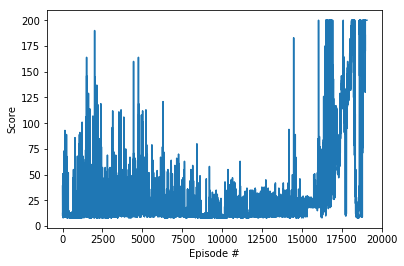

In [14]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(Rs)), Rs)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

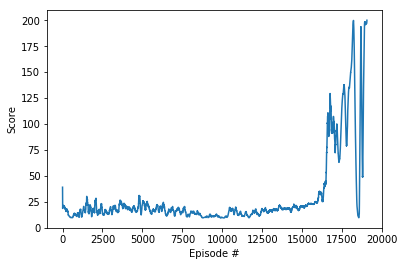

In [16]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(meanRs_deque)), meanRs_deque)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 4. Watch a Smart Agent!

In the next code cell, you will load the trained weights from file to watch a smart agent!

In [17]:
# load the weights from file
agent.q.load_state_dict(torch.load('q-cartpole.pth'))

# for i in range(3):
s = env.reset()
R = 0 # total reward

#for j in range(200):
while True:
    env.render()

    a = agent.act(s)

    s, r, done, _ = env.step(a)
    
    R += r

    if done:
        break

print('total reward:{:.2f}'.format(R))            
env.close()

total reward:200.00


### 5. Explore

In this exercise, you have implemented a DQN agent and demonstrated how to use it to solve an OpenAI Gym environment.  To continue your learning, you are encouraged to complete any (or all!) of the following tasks:
- Amend the various hyperparameters and network architecture to see if you can get your agent to solve the environment faster.  Once you build intuition for the hyperparameters that work well with this environment, try solving a different OpenAI Gym task with discrete actions!
- You may like to implement some improvements such as prioritized experience replay, Double DQN, or Dueling DQN! 
- Write a blog post explaining the intuition behind the DQN algorithm and demonstrating how to use it to solve an RL environment of your choosing.  